## Pokemon Dataset Challenge

In [2]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [17]:
p = Path("./datset/")
dirs = p.glob("*")

image_data = []
labels = []

#Optional
image_paths = []

label_dict = {"Pikachu":0,"Bulbasaur":1,"Meowth":2}
label2pokemon = {0:"Pikachu",1:"Bulbasaur",2:"Meowth"}


for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1]
    
    cnt = 0
    print(folder_dir)
    
    #Iterate over folder_dir and pick all images of the pokemon
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(40,40))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[label])
        cnt += 1
        
    print(cnt)



datset\Bulbasaur
176
datset\Meowth
70
datset\Pikachu
199


# Visualisation

In [99]:
import numpy as np

In [100]:
print(len(image_data))
print(len(labels))

445
445


In [101]:
import random
random.seed(10)

In [102]:
X = np.array(image_data)
Y = np.array(labels)

In [103]:
print(Y.shape)
print(X.shape)

(445,)
(445, 40, 40, 3)


In [104]:
#Shuffle our data
#combined = list(zip(X,Y))
#random.shuffle(combined)
#X[:],Y[:] = zip(*combined) 

In [105]:
from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state=2)

# Normalisation
X = X/255.0

In [106]:
print(Y.shape)
print(X.shape)

(445,)
(445, 40, 40, 3)


In [107]:
print(Y)

[0 2 0 0 2 1 0 0 1 2 0 2 1 0 0 1 1 0 0 2 1 1 2 2 2 0 0 0 1 0 2 0 1 1 1 0 1
 2 0 0 0 0 2 0 1 0 0 2 0 1 1 0 0 2 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0
 0 1 0 0 2 1 0 0 1 1 0 1 1 2 0 0 0 0 0 1 0 2 1 1 1 0 1 2 0 2 2 1 2 0 1 0 1
 1 2 1 1 0 0 2 1 0 1 0 1 1 2 0 1 2 1 2 0 2 0 0 1 0 0 0 1 1 0 0 2 0 1 0 0 0
 0 1 0 1 1 0 0 1 0 1 0 0 1 2 1 2 0 1 2 1 2 0 0 1 2 2 1 1 0 0 2 1 1 0 0 1 1
 1 0 0 0 2 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 2 1 0 0 2 1 2 2 1 1 0 2 0 0 1 1
 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 2 0 2 1 2 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0
 1 1 0 1 1 1 2 1 2 1 0 1 0 1 0 0 2 2 0 0 2 0 1 1 0 0 0 1 1 1 1 0 0 0 2 0 1
 0 0 1 1 0 0 0 2 2 1 0 0 0 0 0 1 1 0 0 0 0 2 0 0 1 2 0 1 0 1 0 1 2 1 1 1 0
 0 2 2 1 2 0 0 0 1 1 0 1 2 0 2 0 1 1 0 1 2 0 2 0 0 0 1 1 1 1 0 0 1 1 1 0 0
 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 2 1 0 0 0 2 0 1 0 1 2 0 0 1 1 2 1 1 1 1 2 0
 0 2 1 0 0 0 0 1 1 1 0 1 0 0 1 2 1 0 1 1 0 2 0 0 1 2 0 1 0 1 0 0 1 0 1 1 1
 1]


In [108]:
# Draw Some Pokemons
def drawImg(img,label):
    plt.title(label2pokemon[label])
    plt.imshow(img)
    plt.style.use("seaborn")
    plt.axis("off")
    plt.show()
    

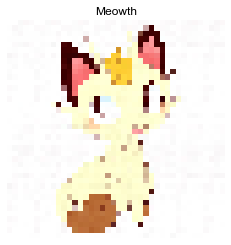

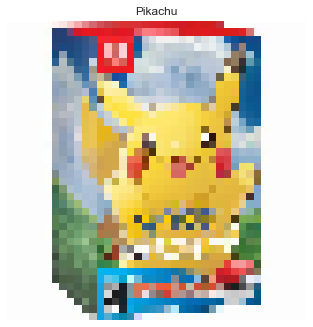

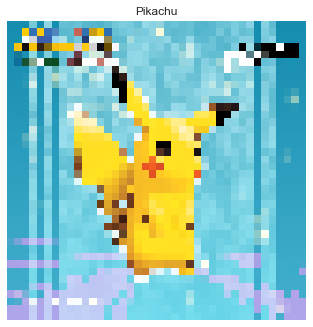

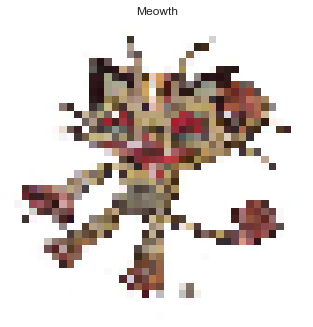

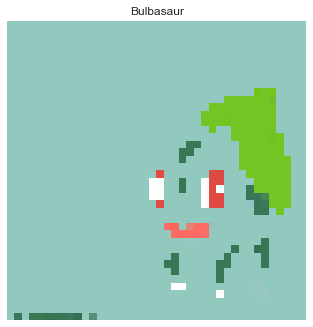

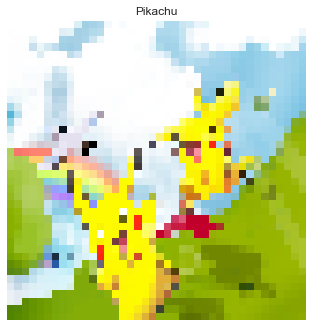

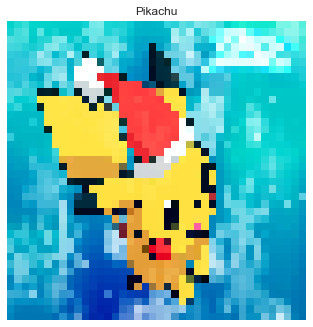

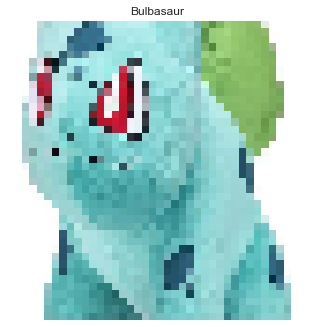

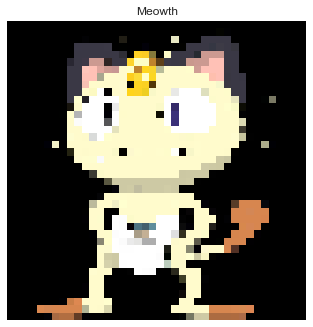

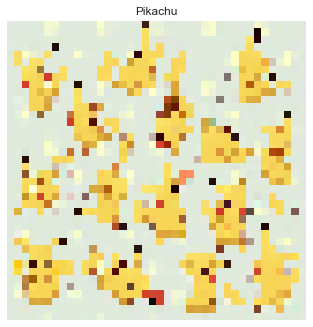

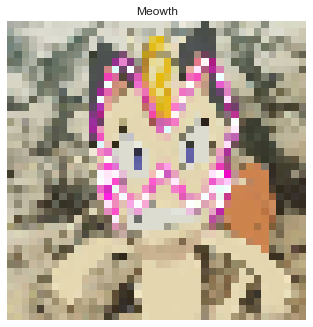

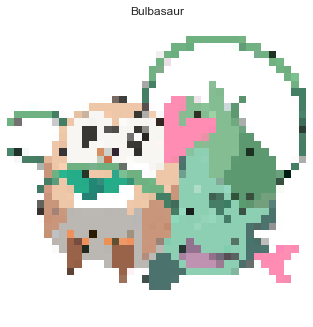

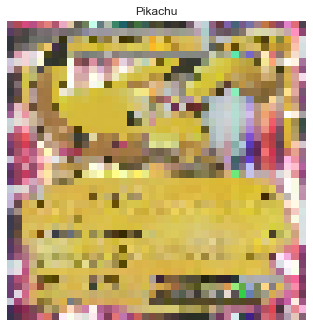

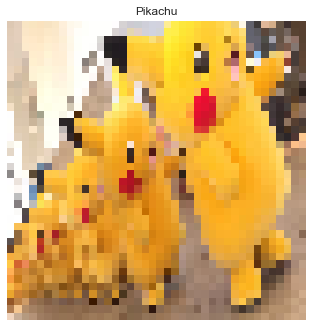

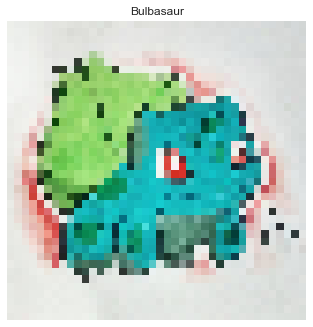

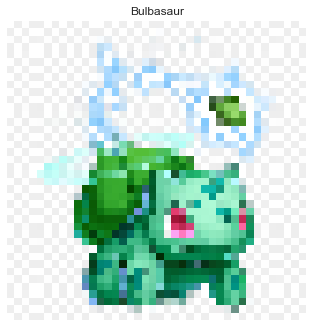

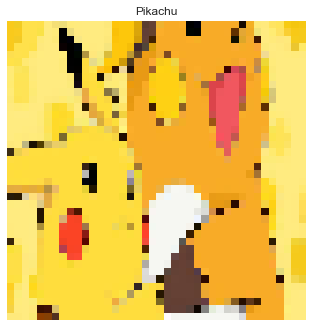

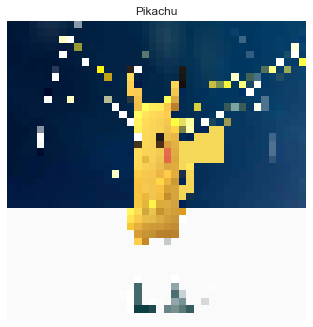

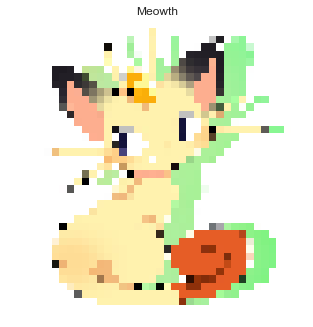

In [26]:
for i in range(1,20):
    drawImg(X[i].reshape(40,40,3),Y[i]) #4800 input units

In [109]:
# Creating the Training and Testing Set

split = int(X.shape[0]*0.8)

X_ = np.array(X)
Y_ = np.array(Y)

# Training Set
X = X_[:split,:]
Y = Y_[:split]

# Test Set
XTest = X_[split:,:]
YTest = Y_[split:]

print(X.shape,Y.shape)
print(XTest.shape,YTest.shape)

(356, 40, 40, 3) (356,)
(89, 40, 40, 3) (89,)


In [110]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} # Dictionary for storing parameters
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
        
    def forward(self,x):
        W1,W2,W3 = self.model["W1"],self.model["W2"],self.model["W3"]
        b1,b2,b3 = self.model["b1"],self.model["b2"],self.model["b3"]
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
    
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model["W1"],self.model["W2"],self.model["W3"]
        b1,b2,b3 = self.model["b1"],self.model["b2"],self.model["b3"]
        
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = np.dot(delta3,W3.T) * (1 - np.square(a2))
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = np.dot(delta2,W2.T) * (1 - np.square(a1))
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"] -= learning_rate*dw1
        self.model["W2"] -= learning_rate*dw2
        self.model["W3"] -= learning_rate*dw3
        
        self.model["b1"] -= learning_rate*db1
        self.model["b2"] -= learning_rate*db2
        self.model["b3"] -= learning_rate*db3
    
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model["W1"],self.model["W2"],self.model["W3"]
        a1,a2,y_ = self.activation_outputs
        
        print("W1",W1.shape)
        print("A1",a1.shape)
        
        print("W2",W2.shape)
        print("A2",a2.shape)
        
        print("W3",W3.shape)
        print("Y_",y_.shape)
        

In [111]:
def softmax(a):
    e_pa = np.exp(a) # Vector
    ans = e_pa/np.sum(e_pa,axis = 1,keepdims=True)
    return ans

In [112]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [113]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = len(np.unique(Y))
    Y_OHOT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHOT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHOT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix+1,l))
        
    return training_loss

In [114]:
model = NeuralNetwork(input_size=4800,layers=[100,50],output_size=3) #4800 features

In [115]:
print(X.shape)

(356, 40, 40, 3)


In [116]:
X = X.reshape(X.shape[0],-1)
print(X.shape,Y.shape)

XTest = XTest.reshape(XTest.shape[0],-1)
print(XTest.shape,YTest.shape)

(356, 4800) (356,)
(89, 4800) (89,)


In [117]:
l = train(X,Y,model,100,0.0002)

Epoch 1 Loss 3.1966
Epoch 2 Loss 2.4473
Epoch 3 Loss 1.8835
Epoch 4 Loss 1.5096
Epoch 5 Loss 1.3351
Epoch 6 Loss 1.1755
Epoch 7 Loss 1.1223
Epoch 8 Loss 1.0222
Epoch 9 Loss 0.9281
Epoch 10 Loss 0.8840
Epoch 11 Loss 0.8546
Epoch 12 Loss 0.8536
Epoch 13 Loss 0.7731
Epoch 14 Loss 0.7604
Epoch 15 Loss 0.7249
Epoch 16 Loss 0.7021
Epoch 17 Loss 0.7331
Epoch 18 Loss 0.6389
Epoch 19 Loss 0.6536
Epoch 20 Loss 0.5926
Epoch 21 Loss 0.5733
Epoch 22 Loss 0.5451
Epoch 23 Loss 0.5487
Epoch 24 Loss 0.5157
Epoch 25 Loss 0.4977
Epoch 26 Loss 0.4844
Epoch 27 Loss 0.4840
Epoch 28 Loss 0.4674
Epoch 29 Loss 0.4412
Epoch 30 Loss 0.4363
Epoch 31 Loss 0.4150
Epoch 32 Loss 0.4232
Epoch 33 Loss 0.3857
Epoch 34 Loss 0.3885
Epoch 35 Loss 0.3826
Epoch 36 Loss 0.3583
Epoch 37 Loss 0.3455
Epoch 38 Loss 0.3419
Epoch 39 Loss 0.3559
Epoch 40 Loss 0.3614
Epoch 41 Loss 0.3487
Epoch 42 Loss 0.3226
Epoch 43 Loss 0.3424
Epoch 44 Loss 0.3407
Epoch 45 Loss 0.3271
Epoch 46 Loss 0.3279
Epoch 47 Loss 0.3007
Epoch 48 Loss 0.2846
E

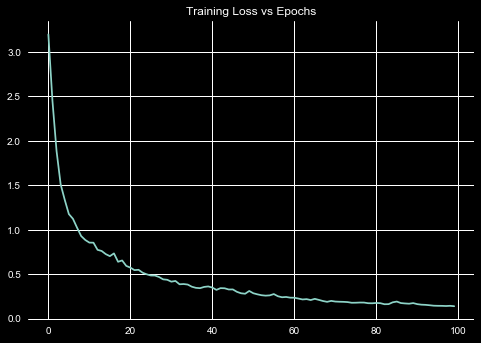

In [118]:
from matplotlib import pyplot as plt
plt.style.use("dark_background")
plt.title("Training Loss vs Epochs")
plt.plot(l)

plt.show()

In [119]:
# Accuracy 
def getAccuracy(X,Y,model):
    outputs = model.predict(X)
    acc = np.sum(outputs==Y)/Y.shape[0]
    return acc
    
print("Train Acc %.4f"%getAccuracy(X,Y,model))
outputs = model.predict(XTest)
print(XTest.shape,YTest.shape,outputs.shape)
print("Test Acc %.4f"%getAccuracy(XTest,YTest,model))

Train Acc 0.8736
(89, 4800) (89,) (89,)
Test Acc 0.5843


In [120]:
from sklearn.metrics import confusion_matrix

In [121]:
from visualize import plot_confusion_matrix

In [122]:
outputs = model.predict(X)
cnf_matrix = confusion_matrix(outputs,Y)
print(cnf_matrix)

[[144   8  15]
 [  7 123   2]
 [  9   4  44]]


Confusion matrix, without normalization
[[144   8  15]
 [  7 123   2]
 [  9   4  44]]


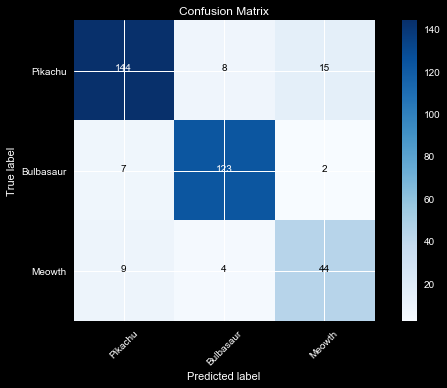

In [123]:
plot_confusion_matrix(cnf_matrix,classes=["Pikachu","Bulbasaur","Meowth"],title="Confusion Matrix")

In [124]:
from sklearn.metrics import classification_report

In [125]:
print(classification_report(outputs,Y))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       167
           1       0.91      0.93      0.92       132
           2       0.72      0.77      0.75        57

    accuracy                           0.87       356
   macro avg       0.84      0.86      0.85       356
weighted avg       0.88      0.87      0.87       356



              precision    recall  f1-score   support

           0       0.64      0.62      0.63        40
           1       0.61      0.69      0.65        36
           2       0.22      0.15      0.18        13

    accuracy                           0.58        89
   macro avg       0.49      0.49      0.49        89
weighted avg       0.57      0.58      0.57        89

Confusion matrix, without normalization
[[25 11  4]
 [ 8 25  3]
 [ 6  5  2]]


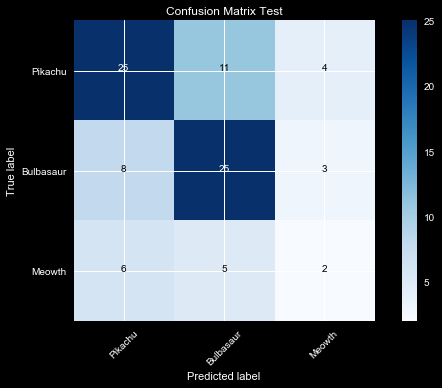

In [126]:
test_outputs = model.predict(XTest)
print(classification_report(test_outputs,YTest))
cnf_matrix = confusion_matrix(test_outputs,YTest)
plot_confusion_matrix(cnf_matrix,classes=["Pikachu","Bulbasaur","Meowth"],title="Confusion Matrix Test")

### Visualise Misclassifications

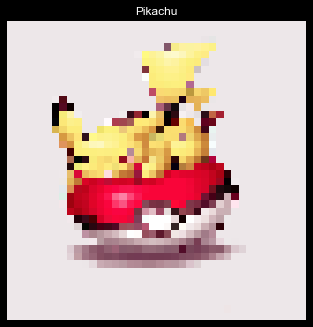

Prediction 31 Bulbasaur


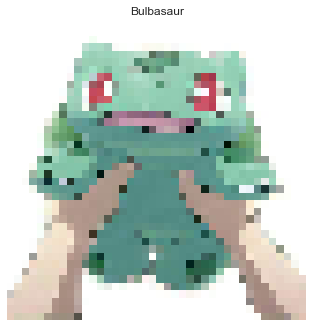

Prediction 62 Pikachu


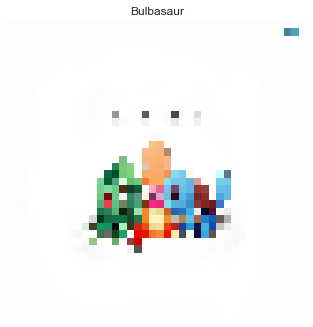

Prediction 123 Meowth


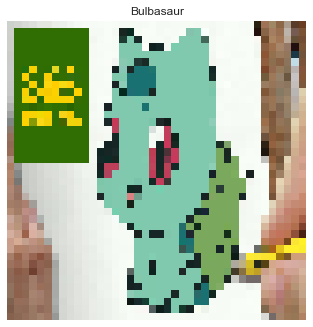

Prediction 226 Meowth


In [60]:
for i in range(Y.shape[0]):
    if Y[i] != outputs[i]:
        drawImg(X[i].reshape(40,40,3),Y[i])
        print("Prediction %d %s"%(i,label2pokemon[outputs[i]]))

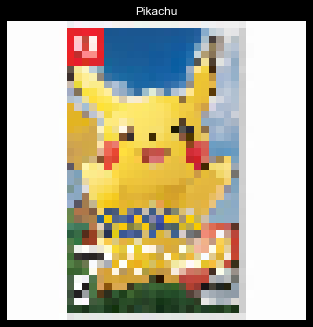

Prediction 0 Pikachu


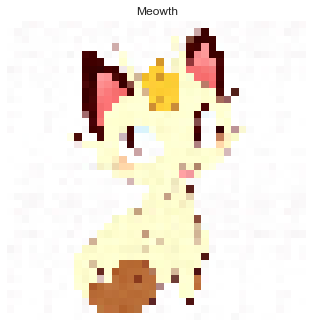

Prediction 1 Meowth


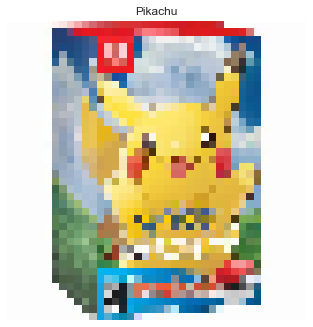

Prediction 2 Pikachu


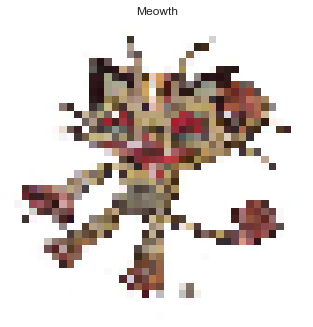

Prediction 4 Meowth


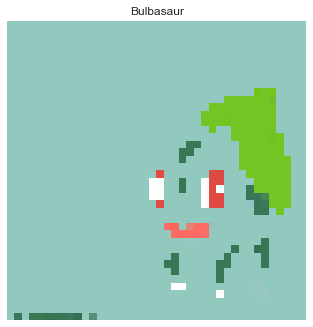

Prediction 5 Bulbasaur


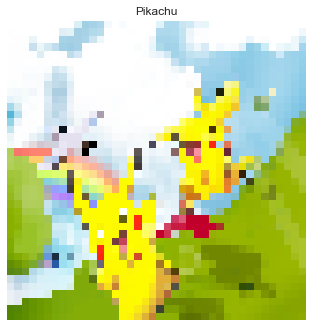

Prediction 6 Pikachu


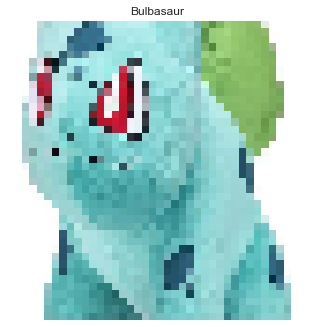

Prediction 8 Bulbasaur


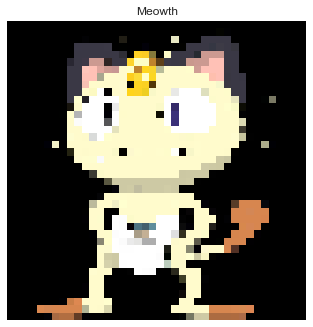

Prediction 9 Meowth


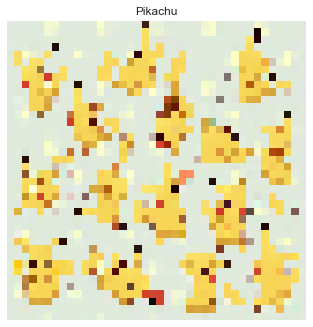

Prediction 10 Pikachu


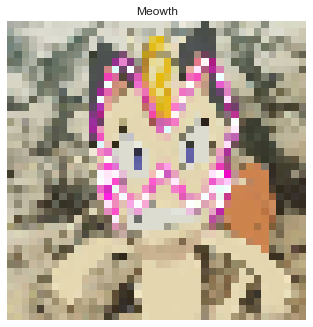

Prediction 11 Meowth


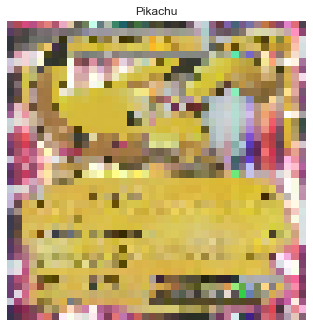

Prediction 13 Pikachu


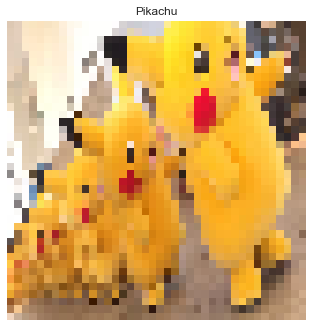

Prediction 14 Pikachu


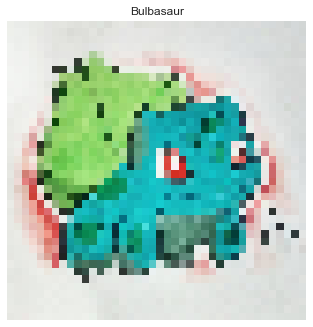

Prediction 15 Bulbasaur


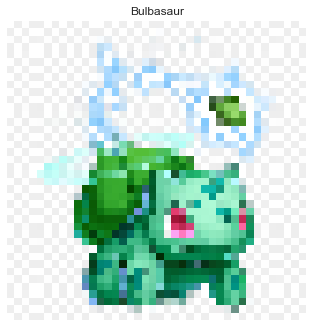

Prediction 16 Bulbasaur


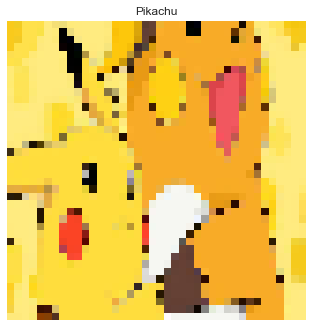

Prediction 17 Pikachu


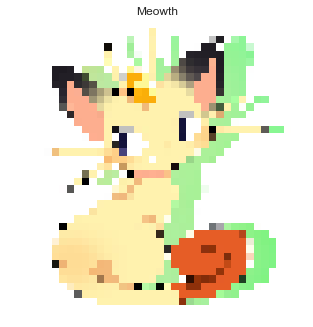

Prediction 19 Meowth


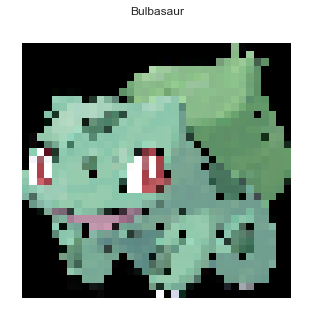

Prediction 20 Bulbasaur


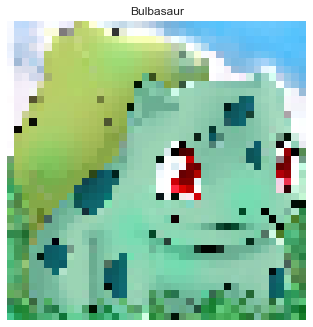

Prediction 21 Bulbasaur


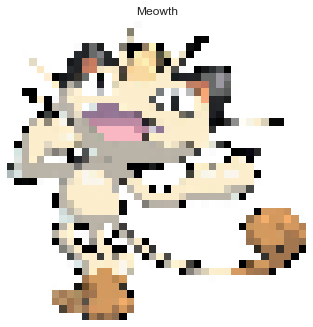

Prediction 22 Meowth


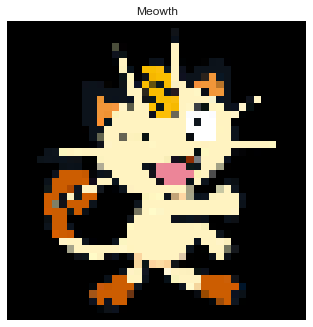

Prediction 23 Meowth


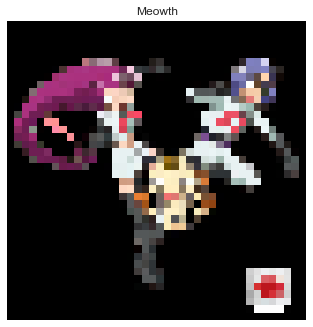

Prediction 24 Meowth


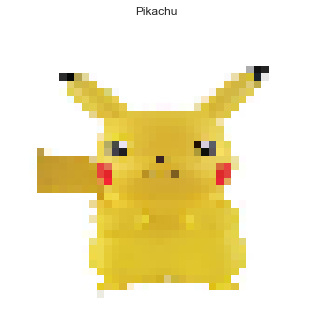

Prediction 25 Pikachu


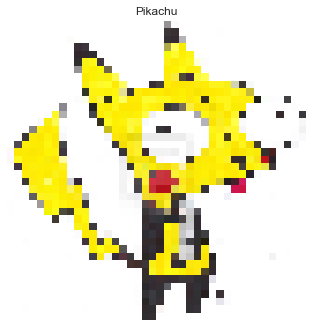

Prediction 26 Pikachu


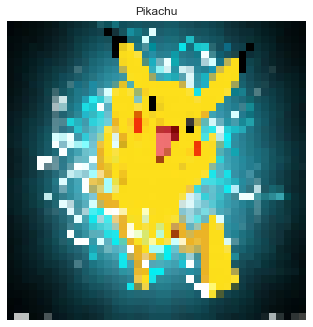

Prediction 27 Pikachu


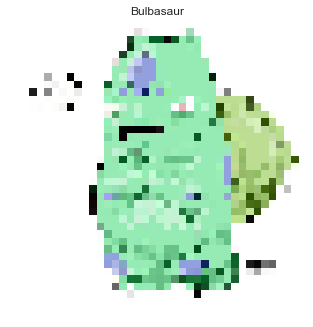

Prediction 28 Bulbasaur


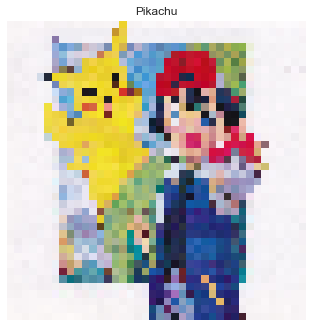

Prediction 29 Pikachu


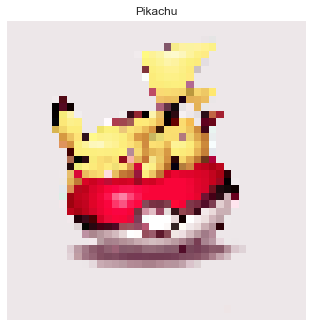

Prediction 31 Pikachu


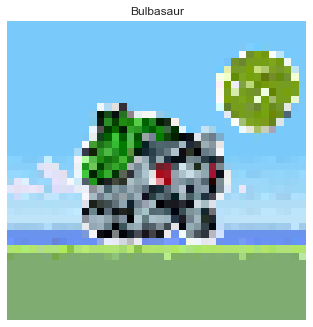

Prediction 32 Bulbasaur


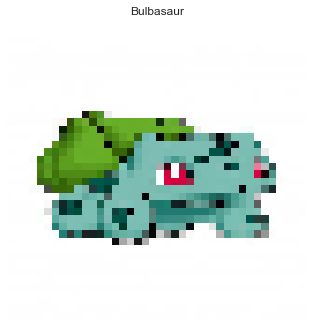

Prediction 33 Bulbasaur


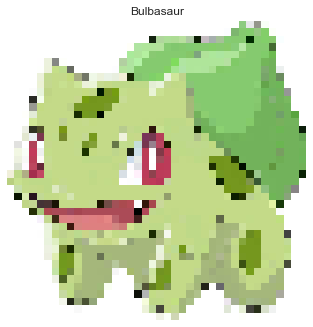

Prediction 34 Bulbasaur


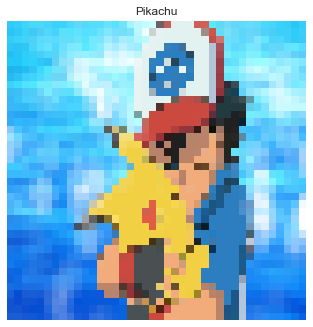

Prediction 35 Pikachu


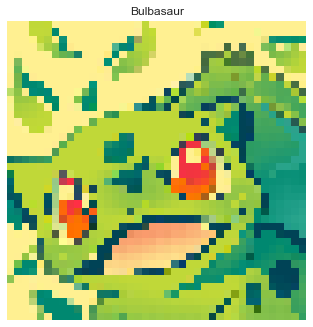

Prediction 36 Bulbasaur


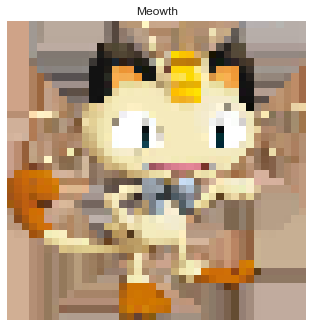

Prediction 37 Meowth


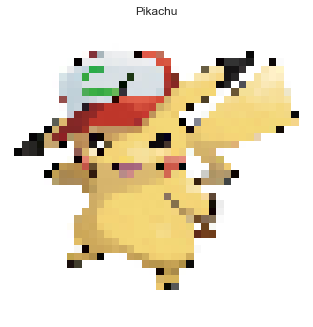

Prediction 38 Pikachu


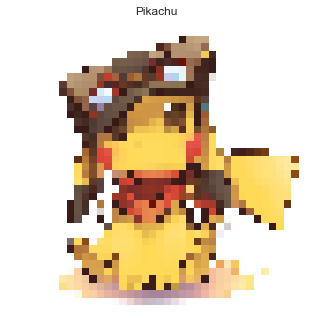

Prediction 39 Pikachu


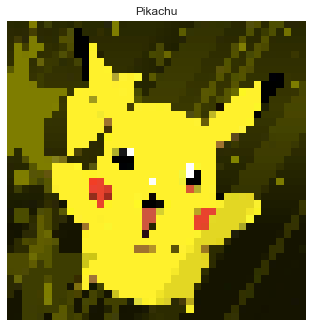

Prediction 40 Pikachu


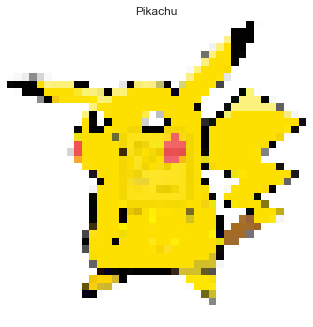

Prediction 41 Pikachu


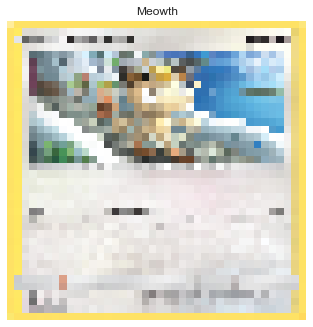

Prediction 42 Meowth


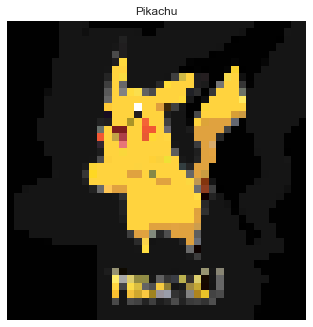

Prediction 43 Pikachu


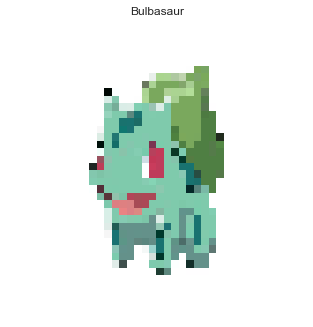

Prediction 44 Bulbasaur


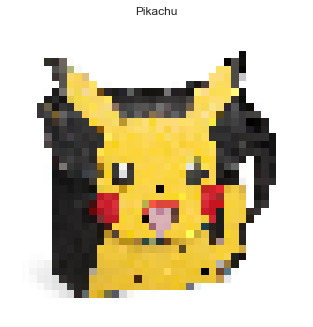

Prediction 45 Pikachu


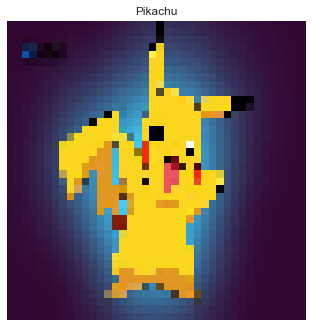

Prediction 46 Pikachu


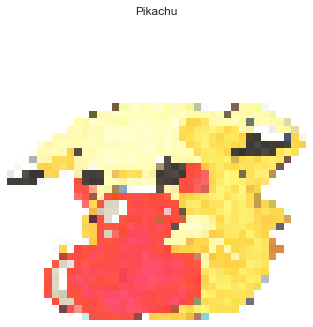

Prediction 48 Pikachu


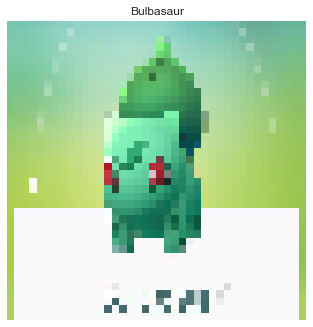

Prediction 49 Bulbasaur


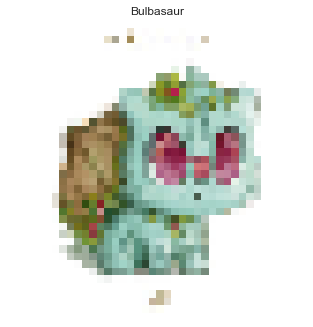

Prediction 50 Bulbasaur


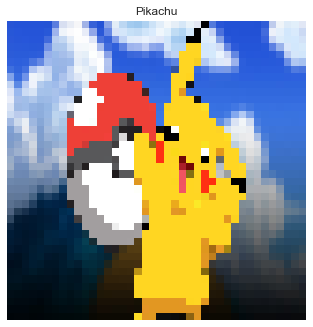

Prediction 51 Pikachu


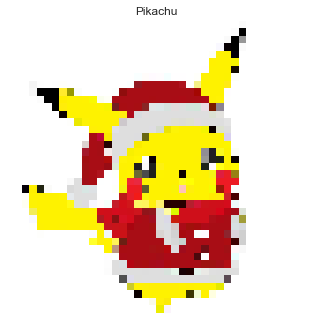

Prediction 52 Pikachu


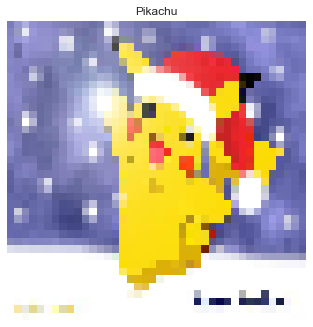

Prediction 54 Pikachu


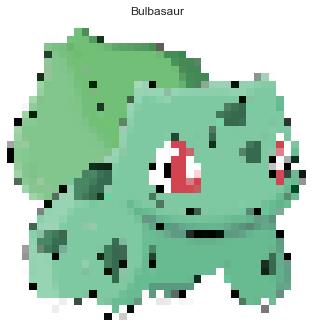

Prediction 55 Bulbasaur


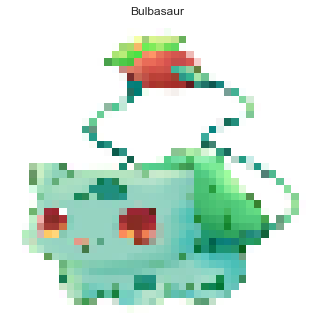

Prediction 56 Bulbasaur


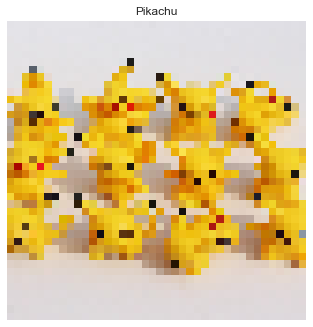

Prediction 57 Pikachu


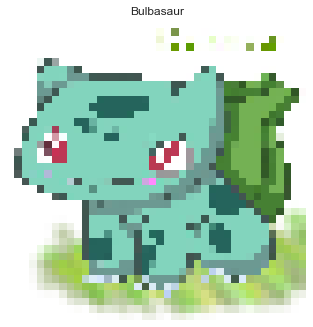

Prediction 58 Bulbasaur


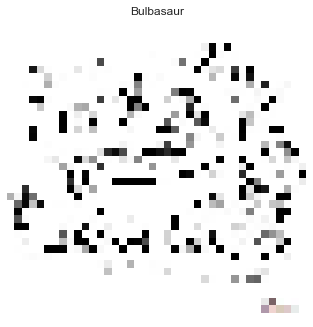

Prediction 59 Bulbasaur


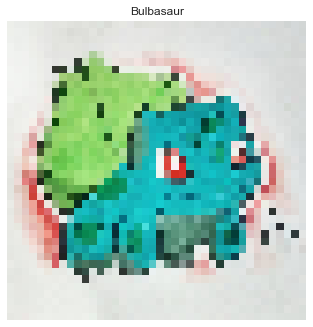

Prediction 61 Bulbasaur


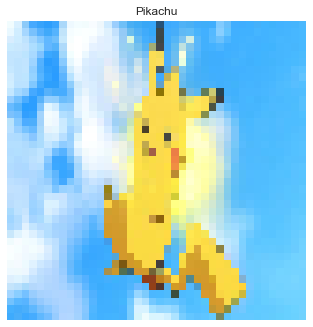

Prediction 63 Pikachu


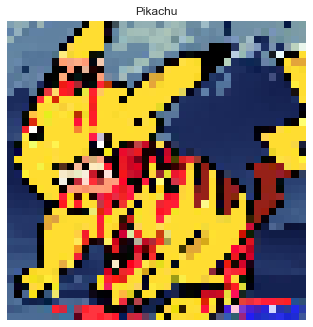

Prediction 64 Pikachu


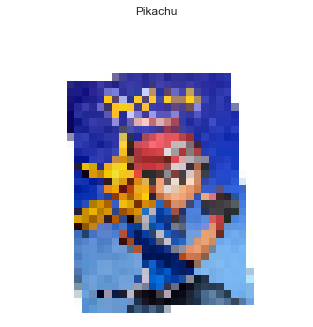

Prediction 65 Pikachu


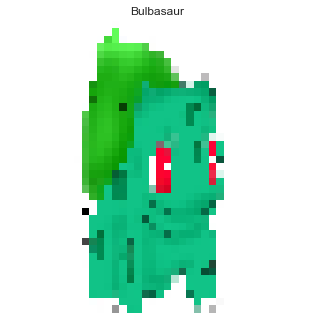

Prediction 66 Bulbasaur


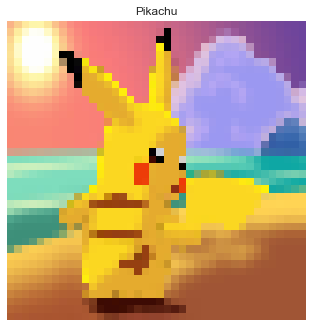

Prediction 68 Pikachu


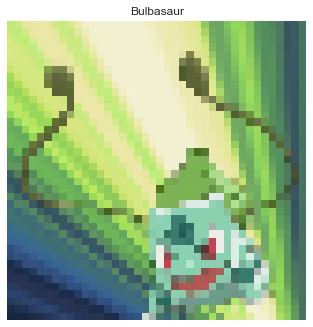

Prediction 69 Bulbasaur


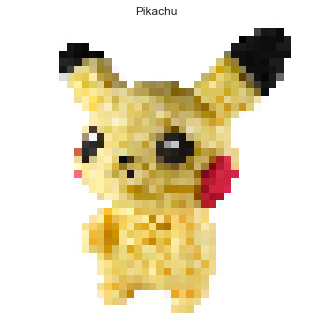

Prediction 70 Pikachu


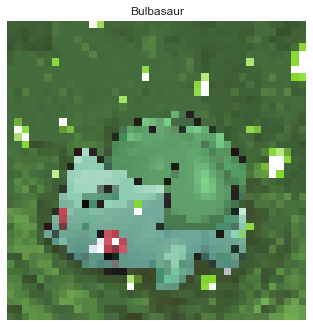

Prediction 71 Bulbasaur


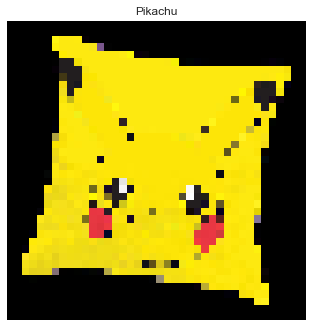

Prediction 72 Pikachu


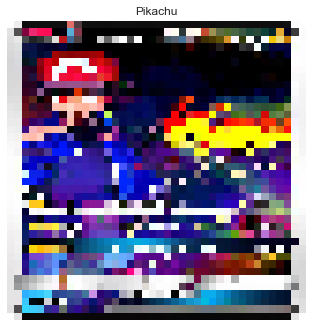

Prediction 73 Pikachu


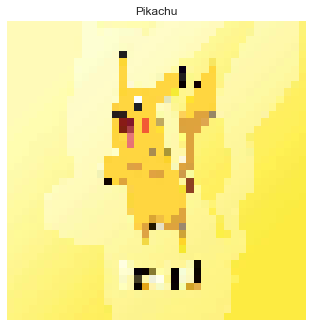

Prediction 74 Pikachu


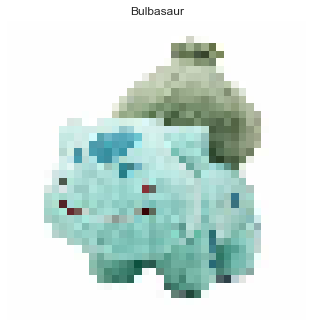

Prediction 75 Bulbasaur


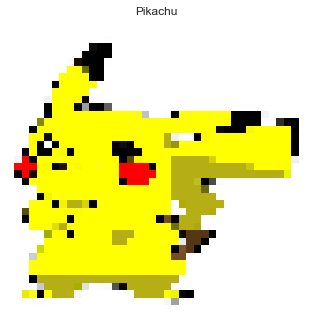

Prediction 76 Pikachu


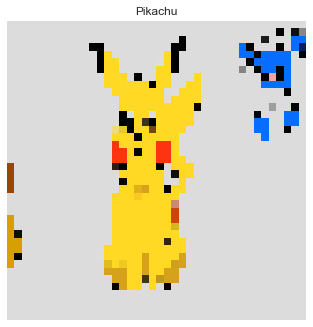

Prediction 77 Pikachu


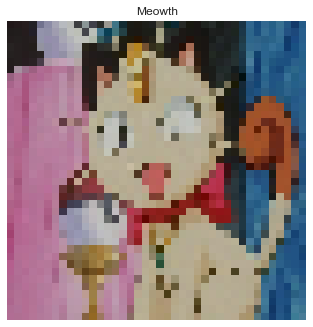

Prediction 78 Meowth


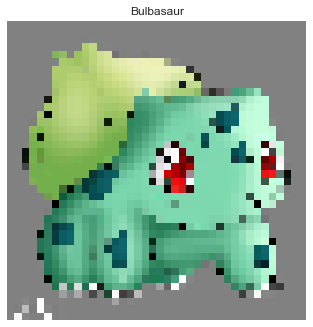

Prediction 79 Bulbasaur


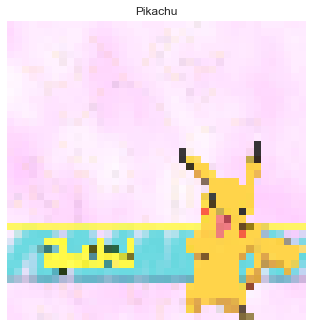

Prediction 80 Pikachu


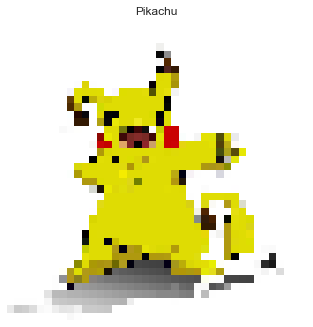

Prediction 81 Pikachu


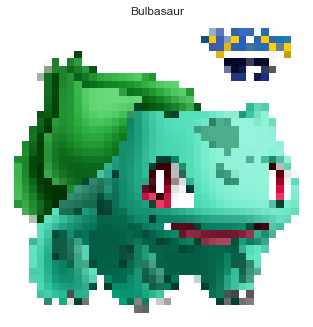

Prediction 82 Bulbasaur


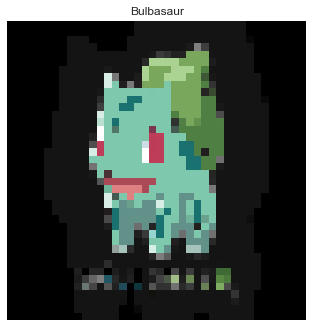

Prediction 83 Bulbasaur


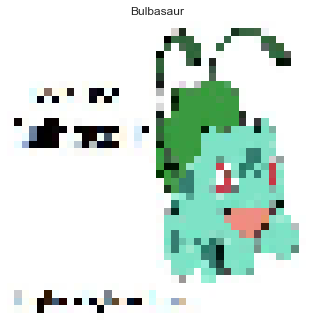

Prediction 85 Bulbasaur


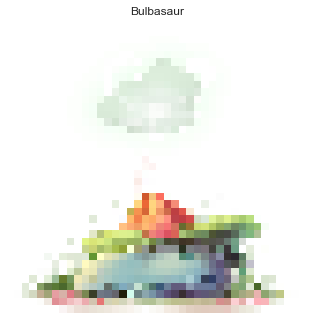

Prediction 86 Bulbasaur


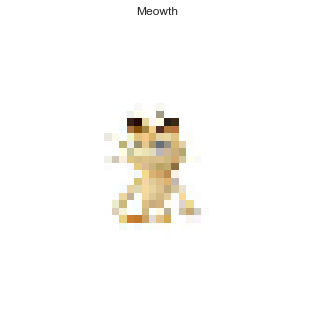

Prediction 87 Meowth


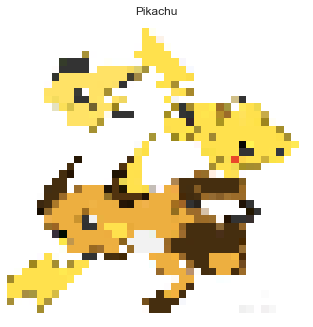

Prediction 88 Pikachu


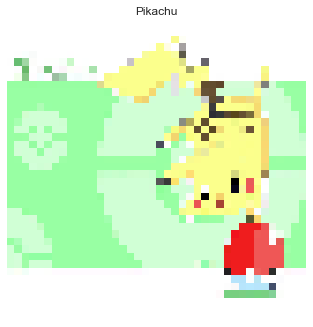

Prediction 89 Pikachu


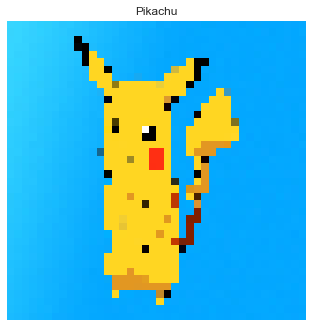

Prediction 90 Pikachu


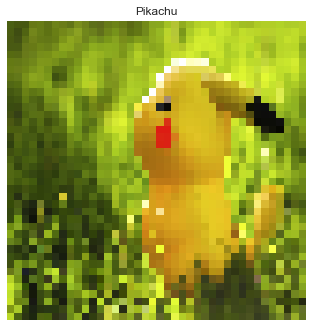

Prediction 91 Pikachu


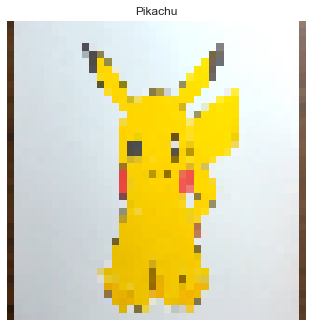

Prediction 92 Pikachu


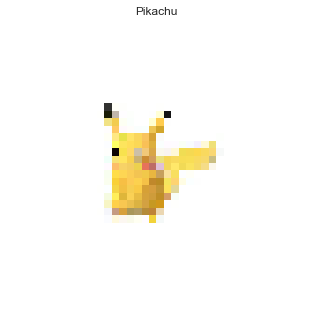

Prediction 94 Pikachu


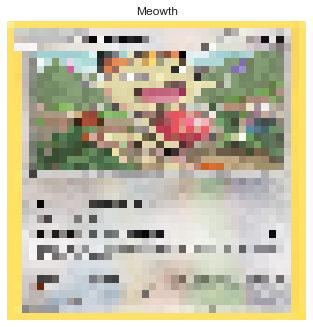

Prediction 95 Meowth


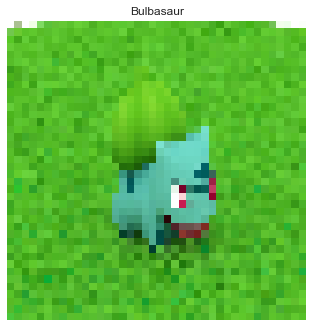

Prediction 96 Bulbasaur


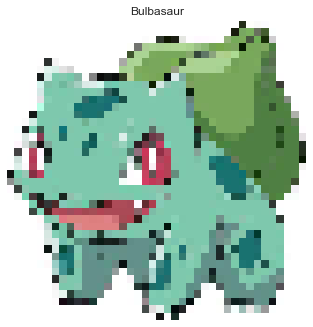

Prediction 97 Bulbasaur


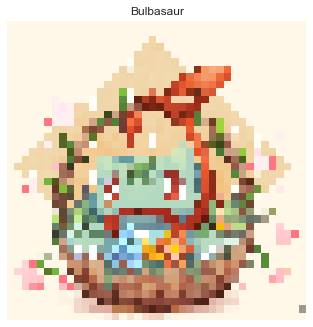

Prediction 98 Bulbasaur


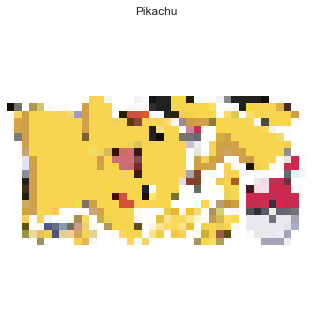

Prediction 99 Pikachu


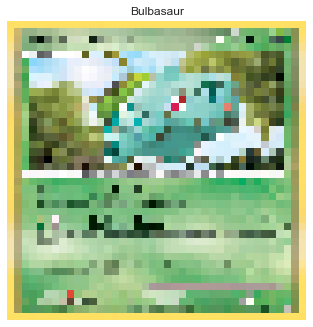

Prediction 100 Bulbasaur


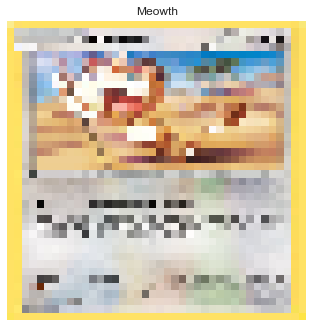

Prediction 101 Meowth


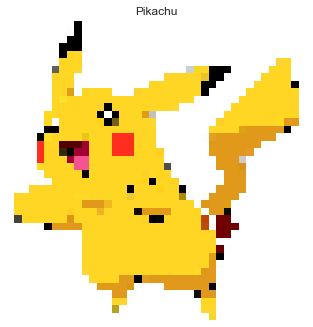

Prediction 102 Pikachu


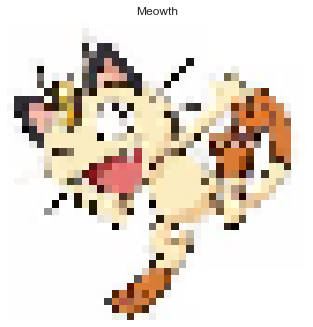

Prediction 103 Meowth


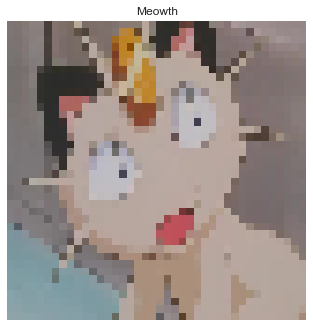

Prediction 104 Meowth


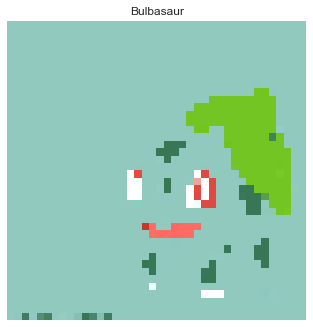

Prediction 105 Bulbasaur


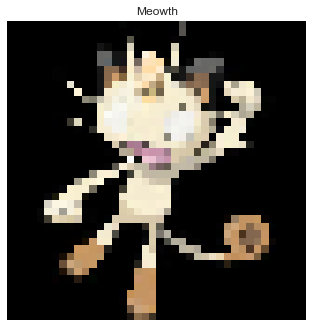

Prediction 106 Meowth


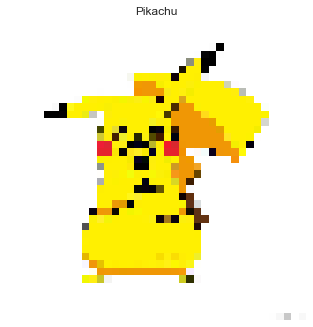

Prediction 107 Pikachu


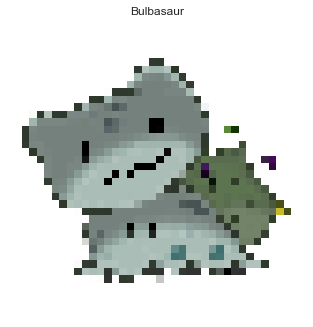

Prediction 108 Bulbasaur


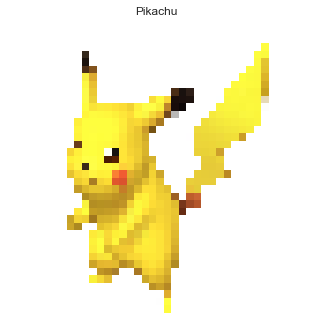

Prediction 109 Pikachu


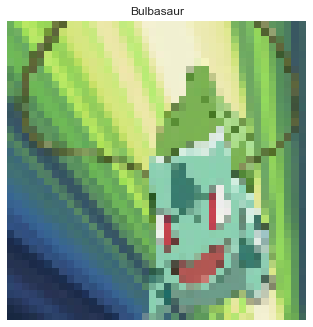

Prediction 110 Bulbasaur


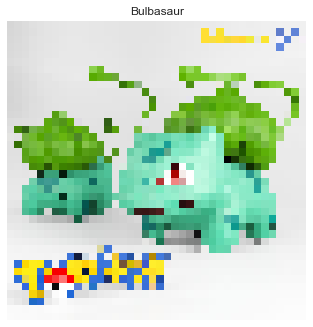

Prediction 111 Bulbasaur


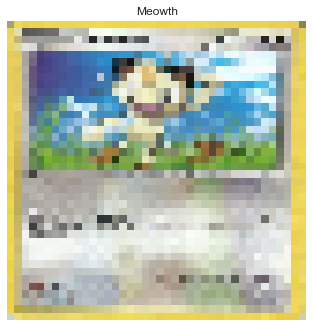

Prediction 112 Meowth


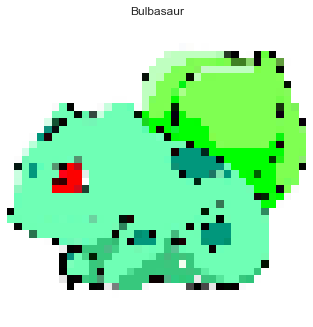

Prediction 113 Bulbasaur


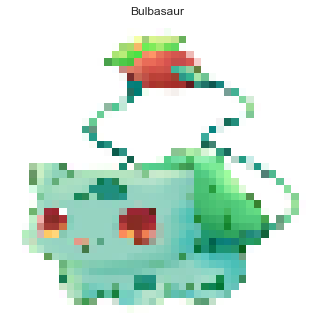

Prediction 114 Bulbasaur


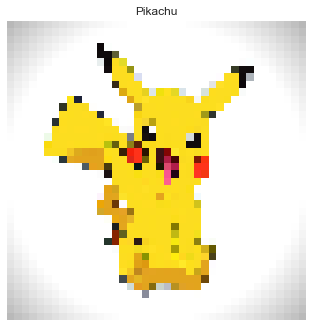

Prediction 115 Pikachu


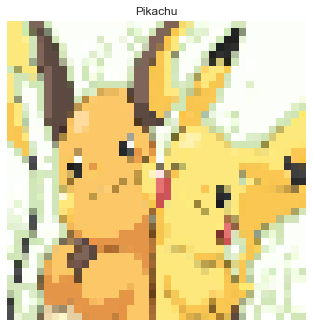

Prediction 116 Pikachu


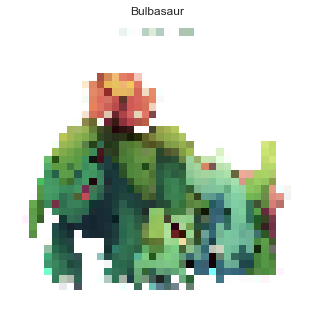

Prediction 118 Bulbasaur


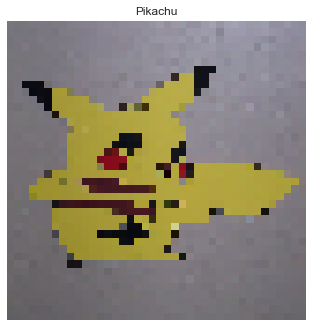

Prediction 119 Pikachu


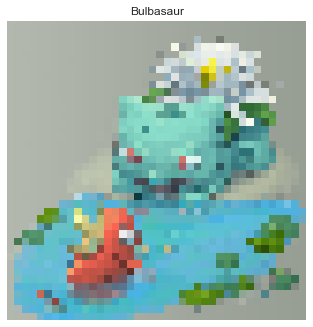

Prediction 120 Bulbasaur


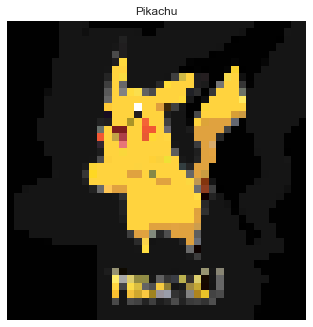

Prediction 121 Pikachu


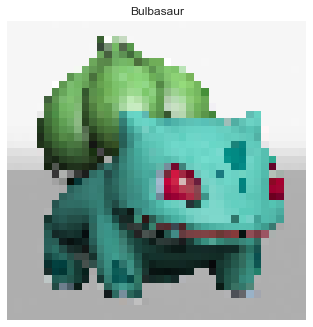

Prediction 122 Bulbasaur


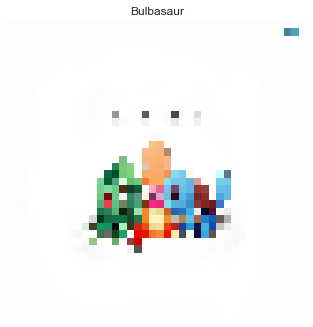

Prediction 123 Bulbasaur


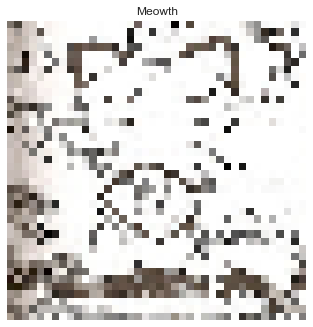

Prediction 124 Meowth


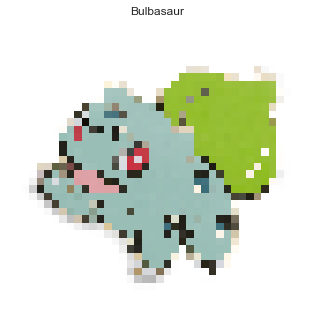

Prediction 126 Bulbasaur


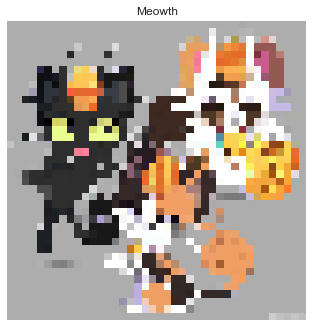

Prediction 127 Meowth


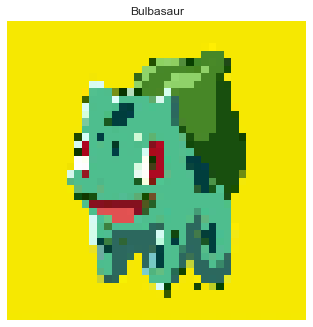

Prediction 128 Bulbasaur


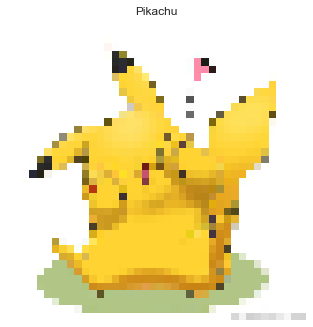

Prediction 130 Pikachu


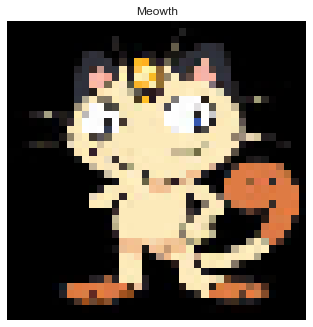

Prediction 131 Meowth


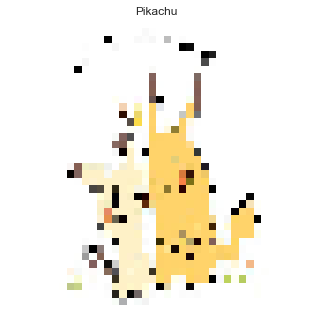

Prediction 132 Pikachu


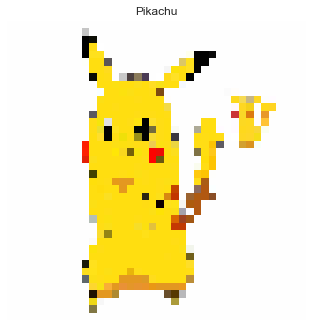

Prediction 133 Pikachu


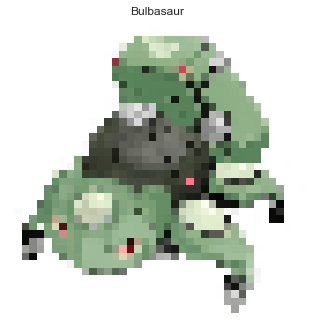

Prediction 134 Bulbasaur


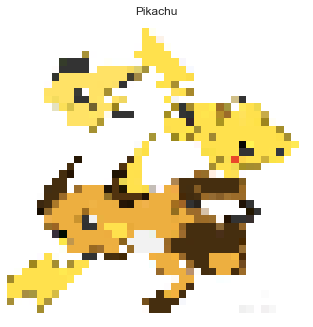

Prediction 135 Pikachu


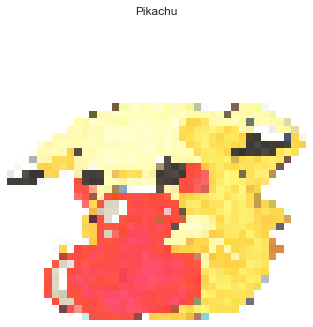

Prediction 136 Pikachu


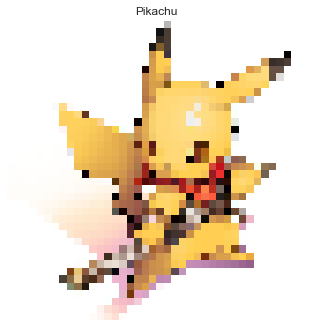

Prediction 137 Pikachu


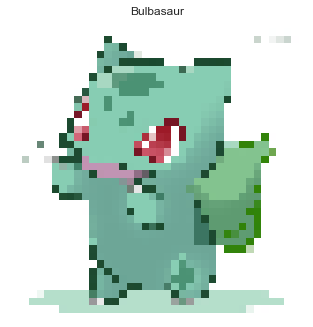

Prediction 138 Bulbasaur


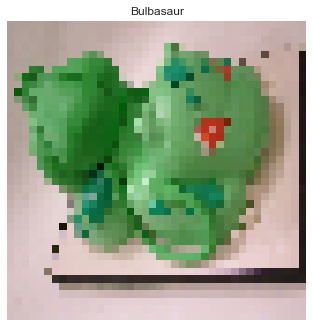

Prediction 139 Bulbasaur


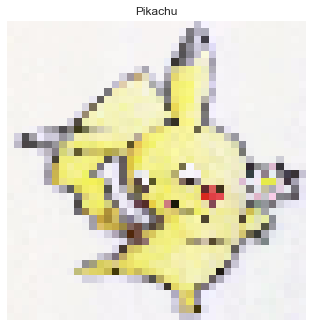

Prediction 140 Pikachu


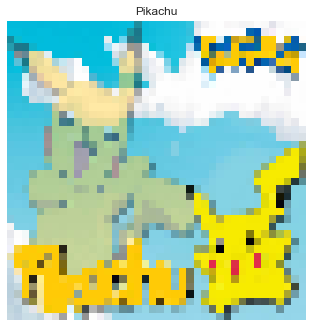

Prediction 143 Pikachu


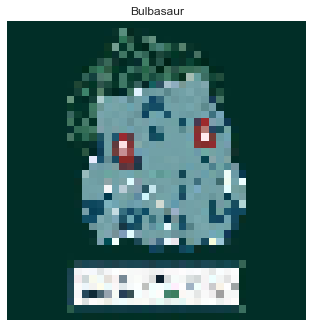

Prediction 144 Bulbasaur


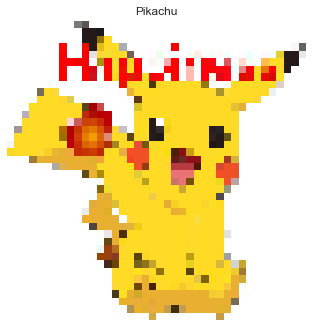

Prediction 145 Pikachu


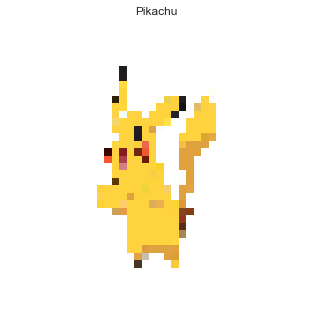

Prediction 147 Pikachu


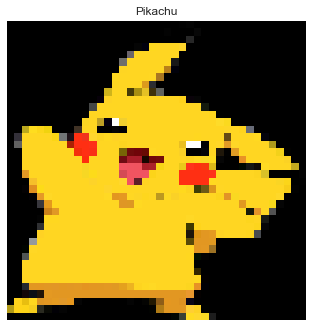

Prediction 148 Pikachu


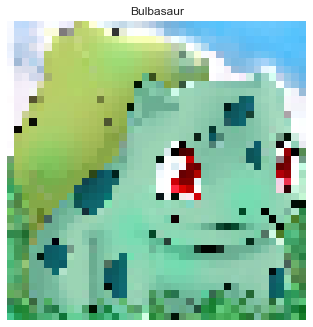

Prediction 149 Bulbasaur


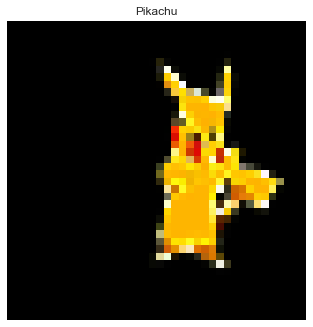

Prediction 150 Pikachu


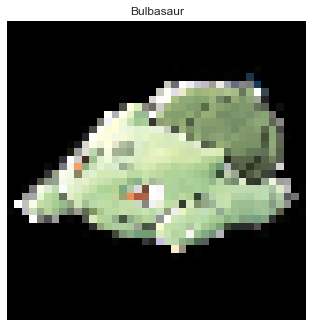

Prediction 151 Bulbasaur


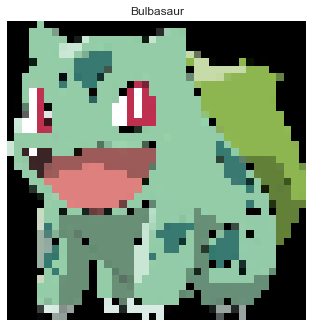

Prediction 152 Bulbasaur


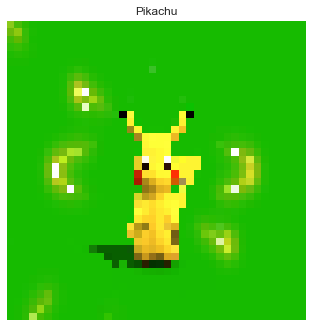

Prediction 153 Pikachu


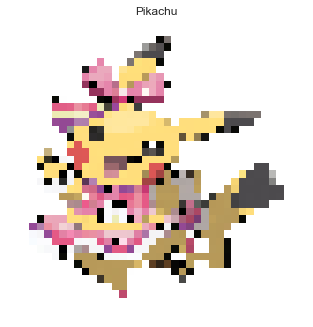

Prediction 154 Pikachu


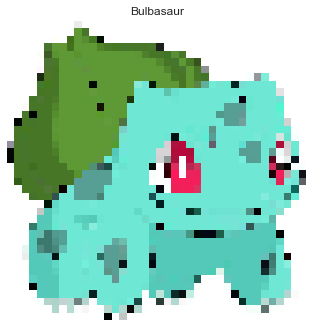

Prediction 155 Bulbasaur


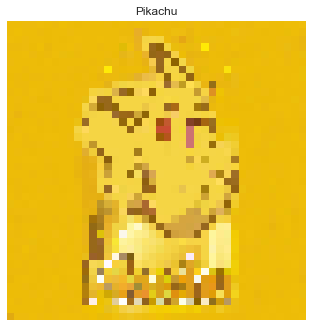

Prediction 156 Pikachu


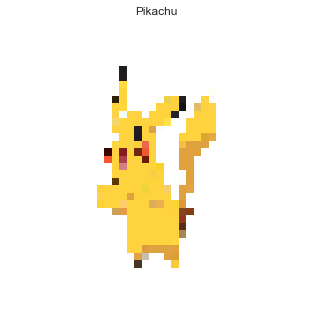

Prediction 158 Pikachu


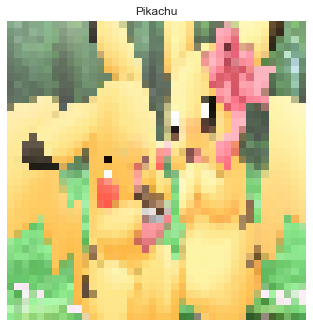

Prediction 159 Pikachu


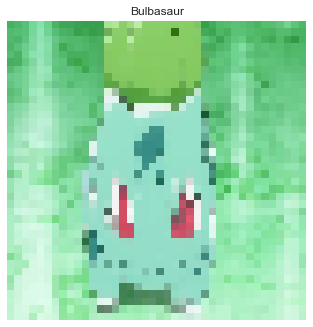

Prediction 160 Bulbasaur


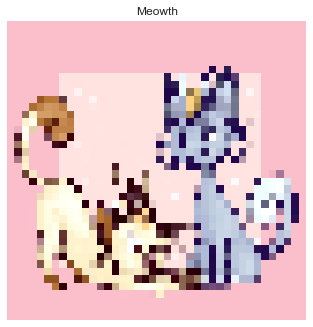

Prediction 161 Meowth


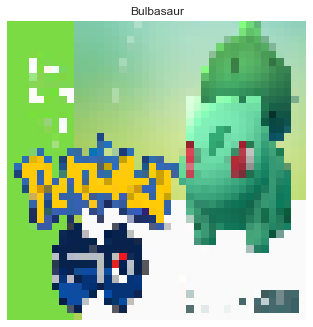

Prediction 162 Bulbasaur


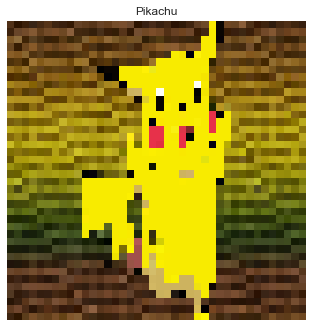

Prediction 164 Pikachu


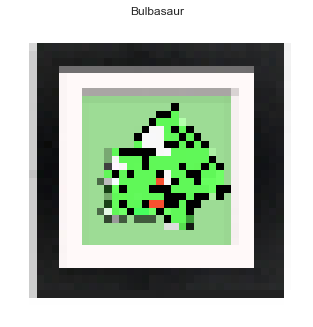

Prediction 167 Bulbasaur


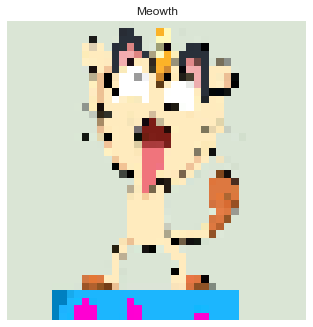

Prediction 168 Meowth


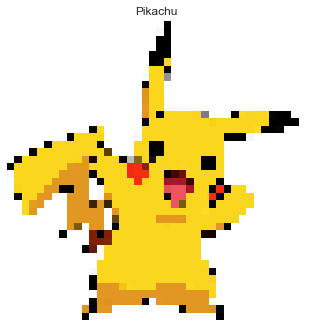

Prediction 169 Pikachu


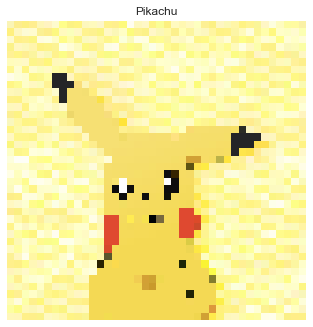

Prediction 170 Pikachu


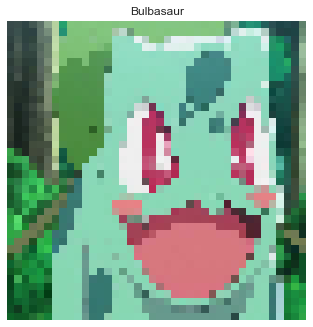

Prediction 171 Bulbasaur


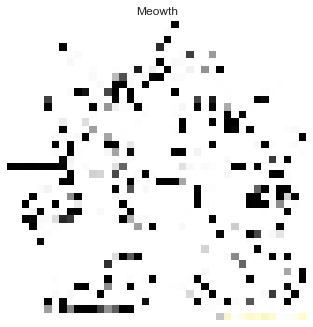

Prediction 172 Meowth


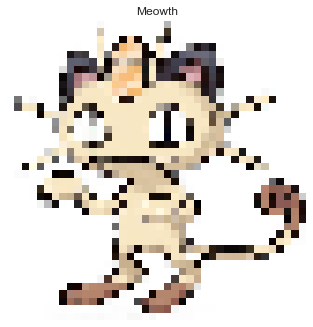

Prediction 173 Meowth


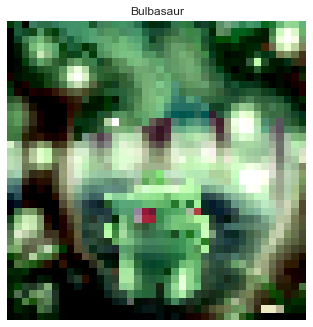

Prediction 174 Bulbasaur


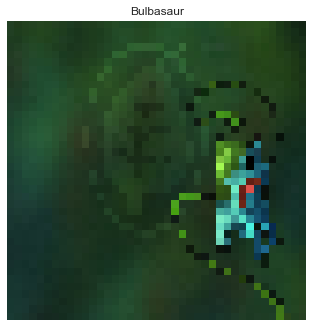

Prediction 175 Bulbasaur


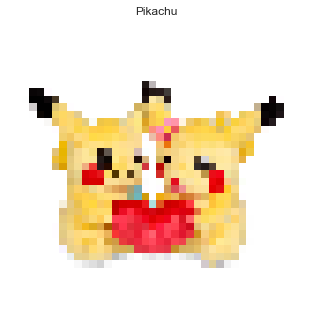

Prediction 176 Pikachu


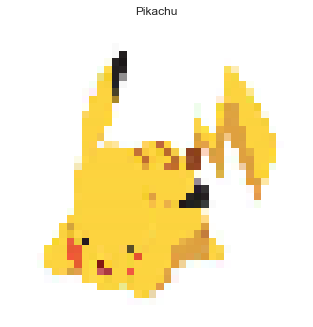

Prediction 177 Pikachu


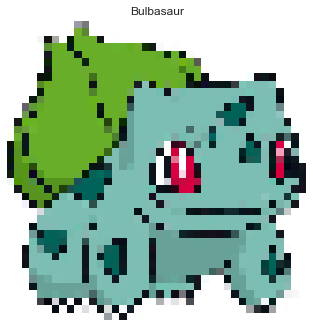

Prediction 179 Bulbasaur


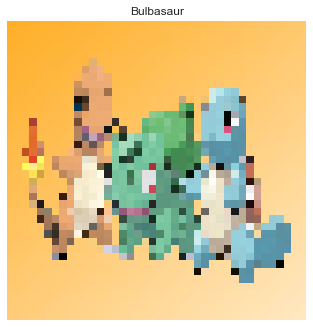

Prediction 180 Bulbasaur


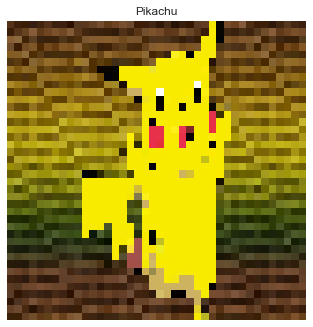

Prediction 181 Pikachu


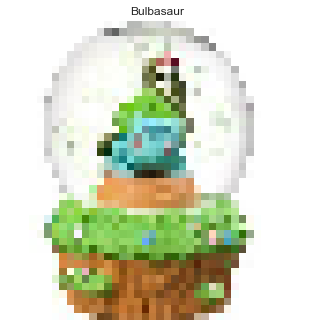

Prediction 183 Bulbasaur


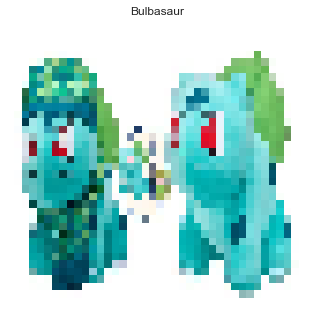

Prediction 184 Bulbasaur


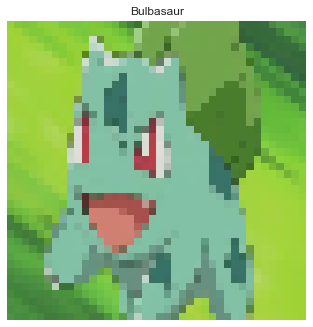

Prediction 185 Bulbasaur


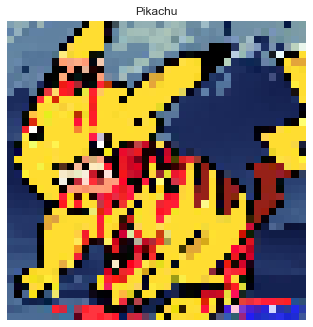

Prediction 186 Pikachu


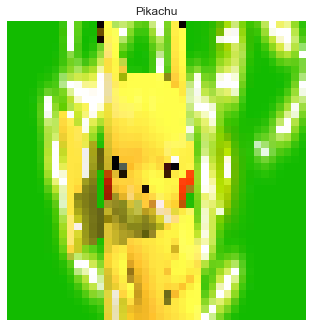

Prediction 187 Pikachu


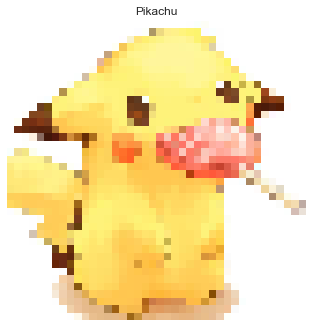

Prediction 190 Pikachu


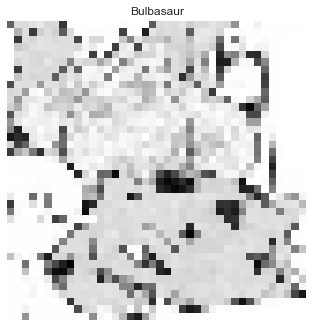

Prediction 191 Bulbasaur


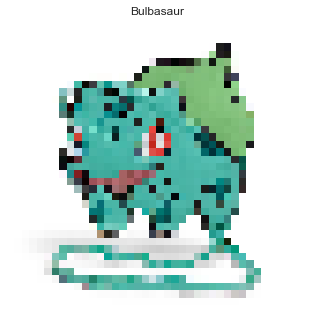

Prediction 192 Bulbasaur


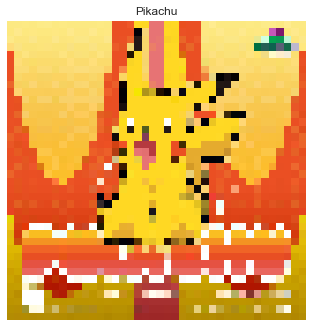

Prediction 193 Pikachu


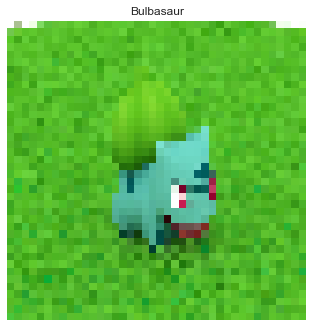

Prediction 194 Bulbasaur


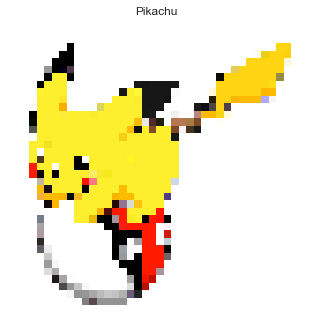

Prediction 195 Pikachu


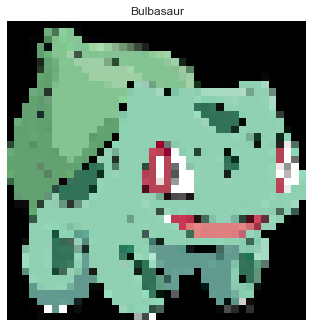

Prediction 196 Bulbasaur


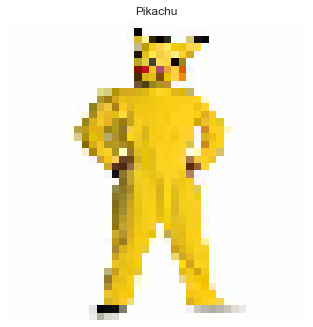

Prediction 197 Pikachu


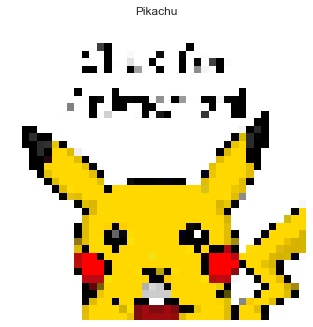

Prediction 198 Pikachu


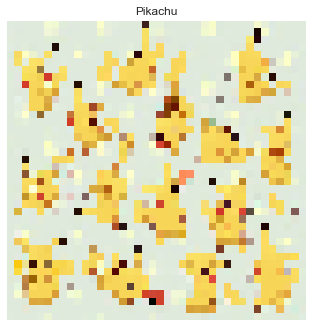

Prediction 199 Pikachu


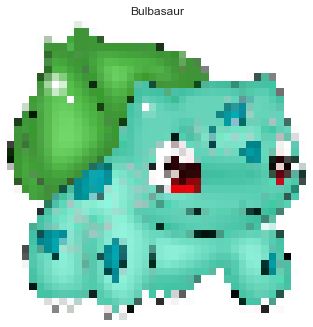

Prediction 200 Bulbasaur


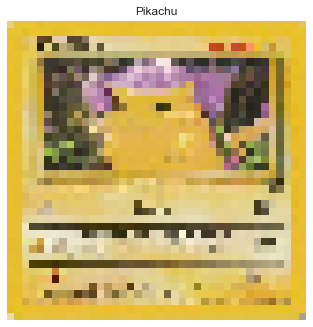

Prediction 201 Pikachu


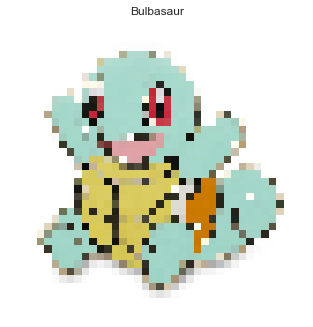

Prediction 202 Bulbasaur


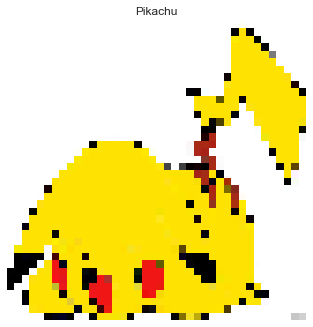

Prediction 204 Pikachu


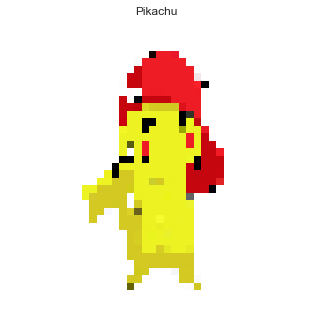

Prediction 205 Pikachu


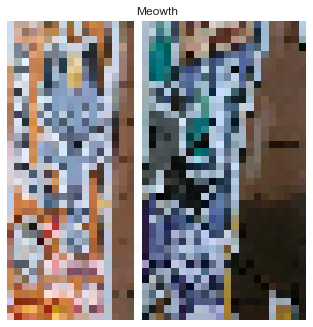

Prediction 206 Meowth


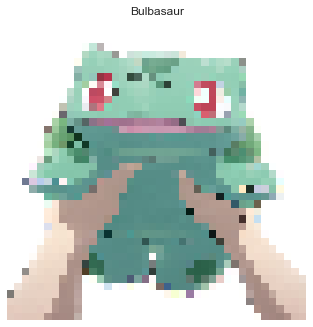

Prediction 207 Bulbasaur


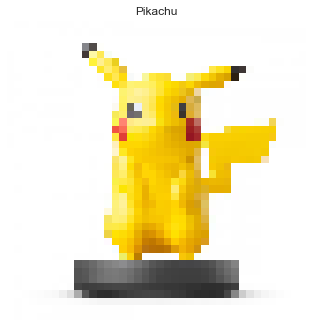

Prediction 208 Pikachu


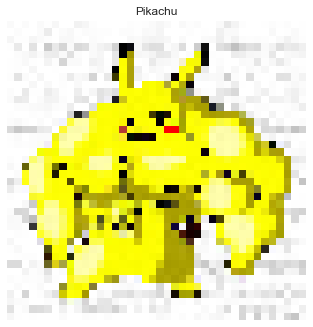

Prediction 209 Pikachu


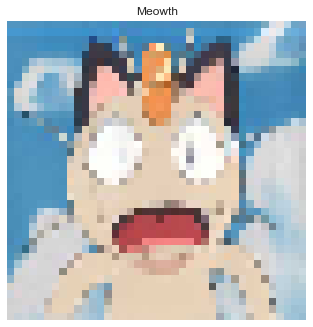

Prediction 210 Meowth


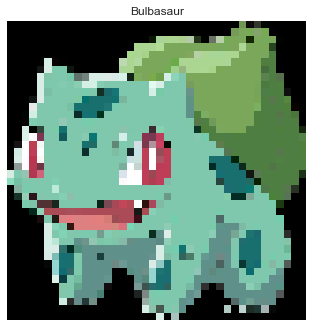

Prediction 211 Bulbasaur


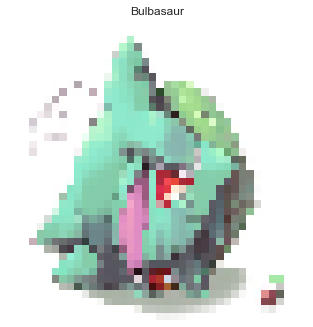

Prediction 214 Bulbasaur


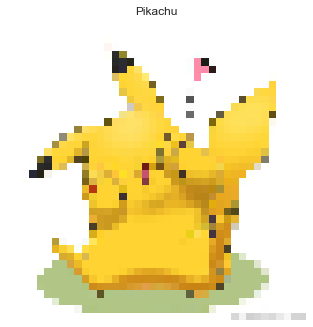

Prediction 216 Pikachu


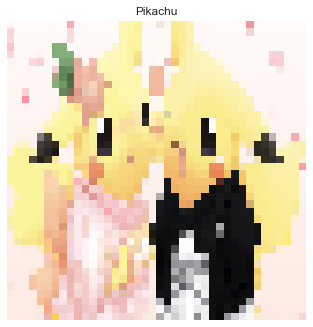

Prediction 218 Pikachu


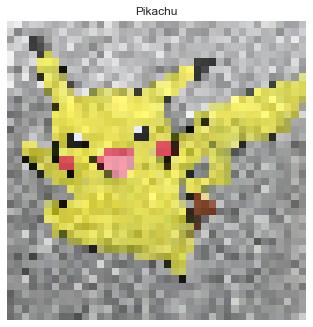

Prediction 219 Pikachu


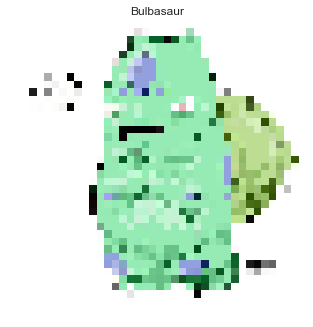

Prediction 220 Bulbasaur


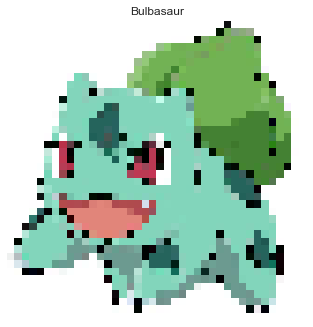

Prediction 221 Bulbasaur


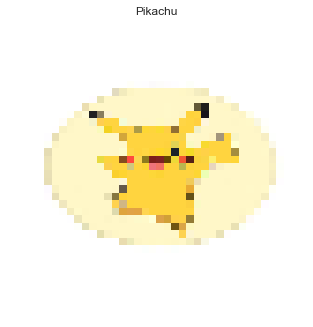

Prediction 222 Pikachu


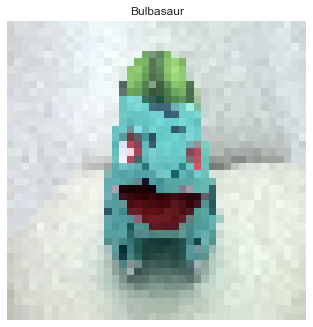

Prediction 223 Bulbasaur


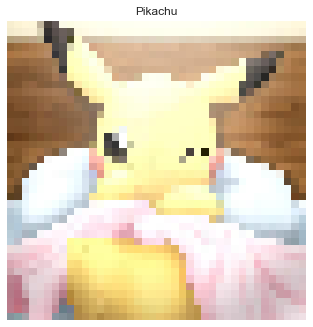

Prediction 224 Pikachu


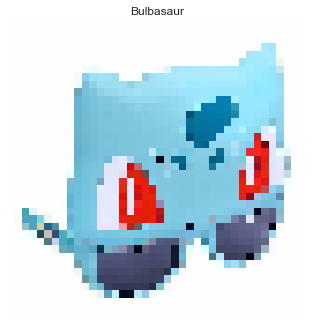

Prediction 225 Bulbasaur


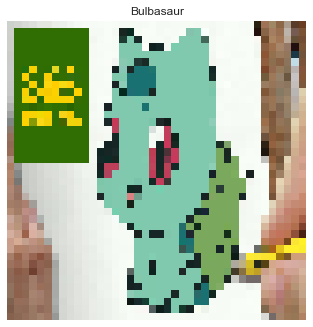

Prediction 226 Bulbasaur


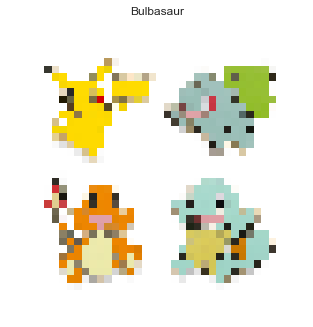

Prediction 227 Bulbasaur


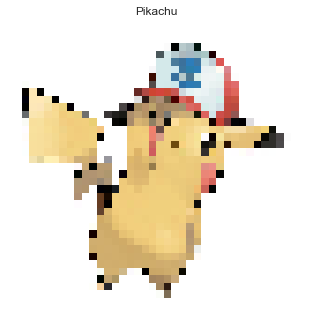

Prediction 228 Pikachu


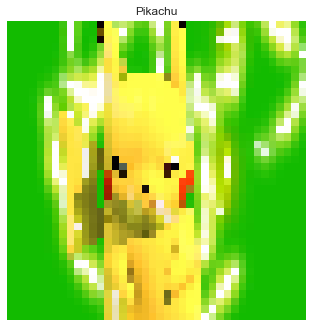

Prediction 229 Pikachu


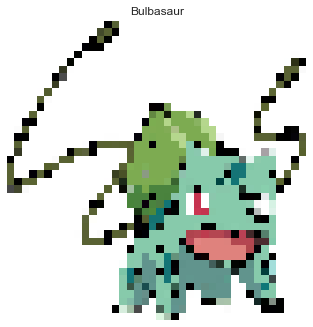

Prediction 230 Bulbasaur


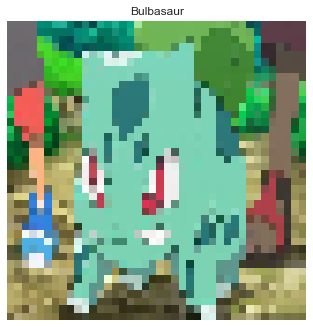

Prediction 231 Bulbasaur


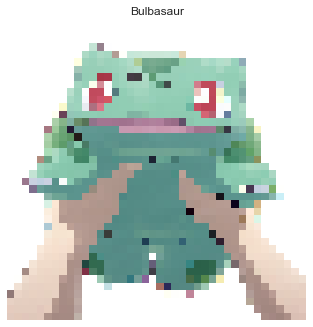

Prediction 232 Bulbasaur


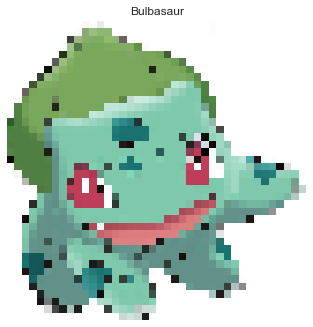

Prediction 233 Bulbasaur


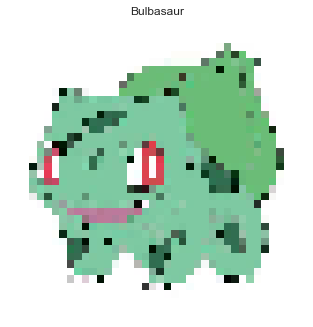

Prediction 234 Bulbasaur


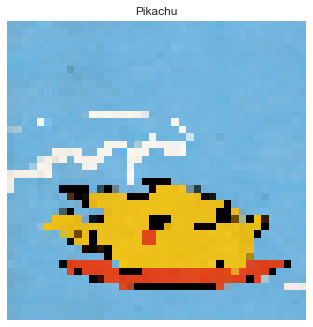

Prediction 235 Pikachu


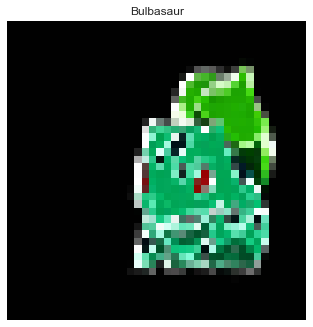

Prediction 236 Bulbasaur


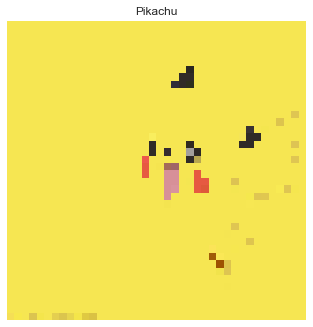

Prediction 237 Pikachu


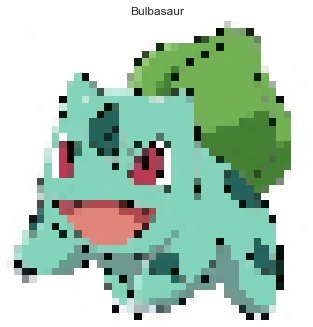

Prediction 238 Bulbasaur


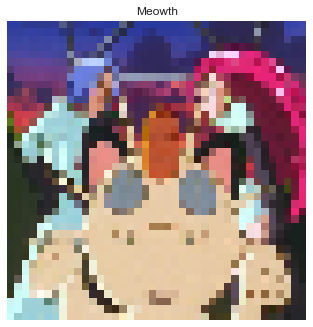

Prediction 239 Meowth


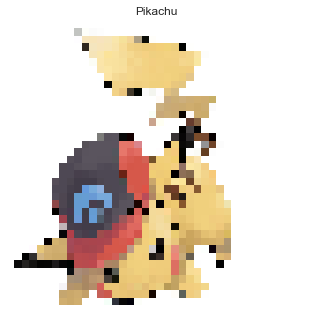

Prediction 240 Pikachu


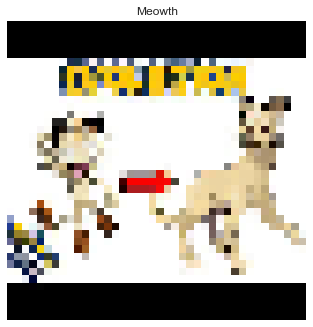

Prediction 241 Meowth


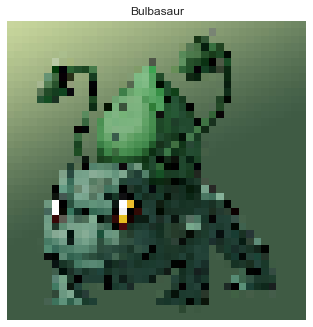

Prediction 242 Bulbasaur


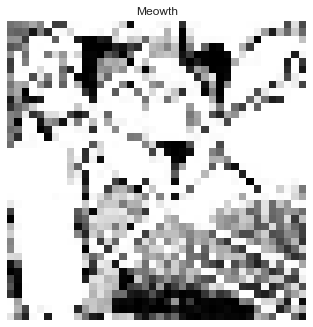

Prediction 243 Meowth


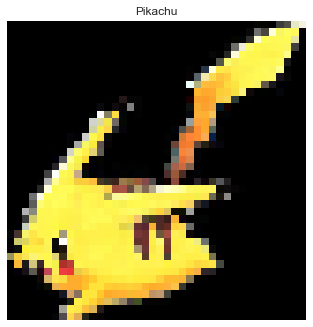

Prediction 244 Pikachu


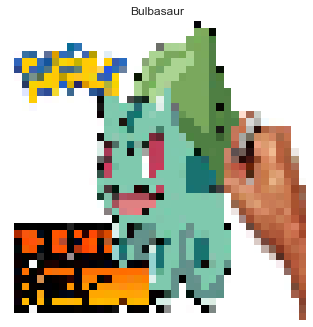

Prediction 245 Bulbasaur


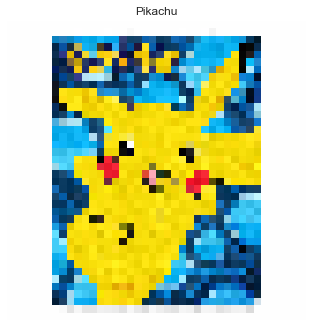

Prediction 246 Pikachu


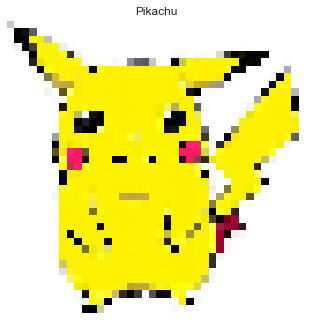

Prediction 247 Pikachu


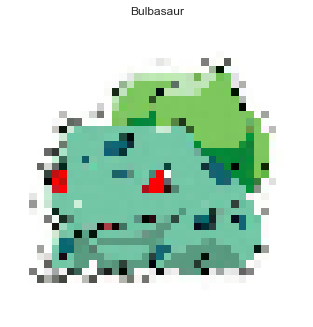

Prediction 248 Bulbasaur


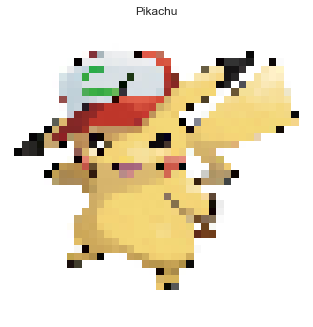

Prediction 249 Pikachu


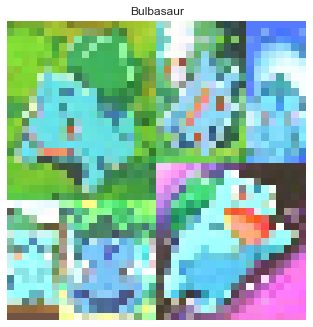

Prediction 250 Bulbasaur


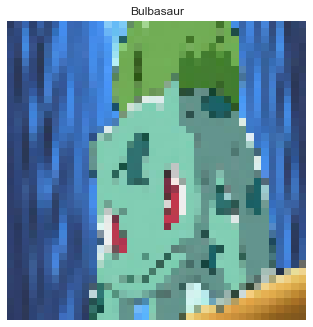

Prediction 251 Bulbasaur


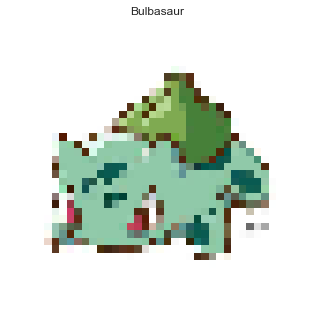

Prediction 252 Bulbasaur


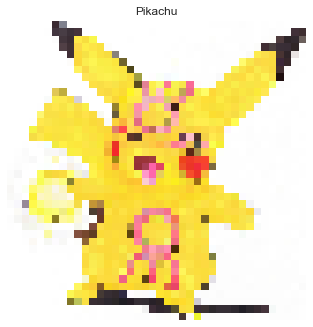

Prediction 253 Pikachu


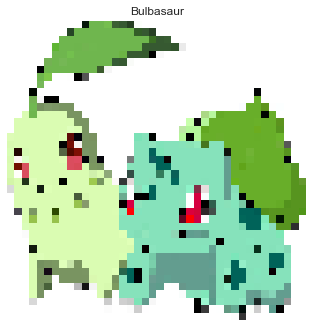

Prediction 254 Bulbasaur


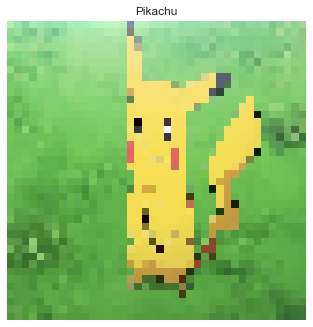

Prediction 255 Pikachu


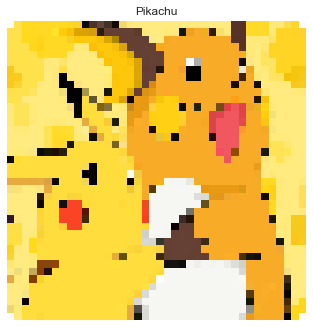

Prediction 256 Pikachu


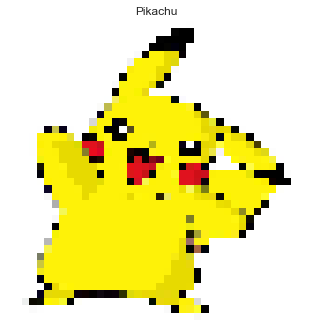

Prediction 257 Pikachu


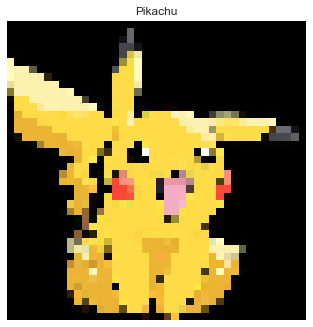

Prediction 258 Pikachu


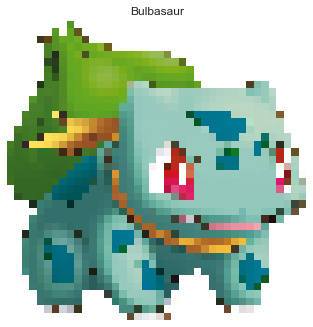

Prediction 259 Bulbasaur


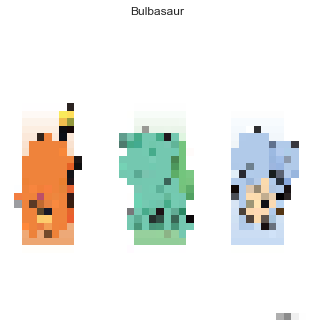

Prediction 260 Bulbasaur


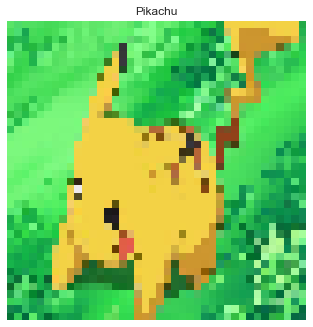

Prediction 261 Pikachu


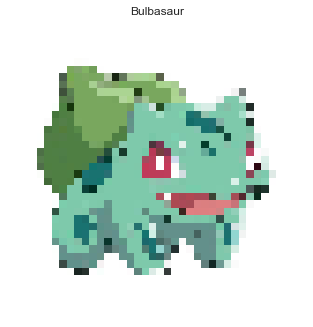

Prediction 262 Bulbasaur


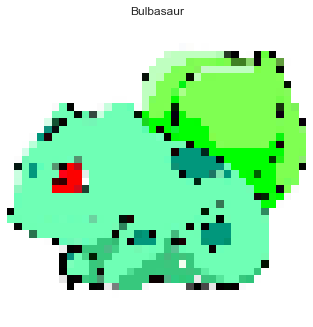

Prediction 263 Bulbasaur


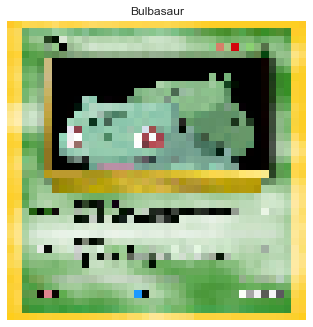

Prediction 264 Bulbasaur


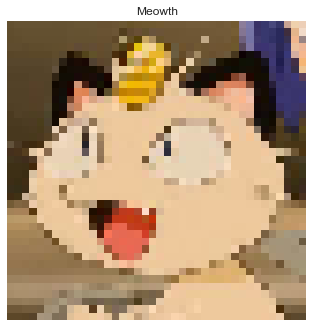

Prediction 265 Meowth


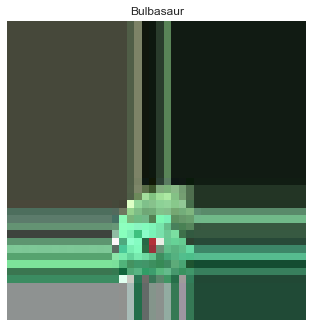

Prediction 266 Bulbasaur


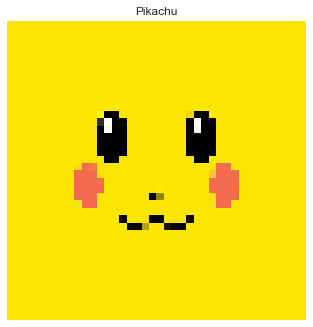

Prediction 269 Pikachu


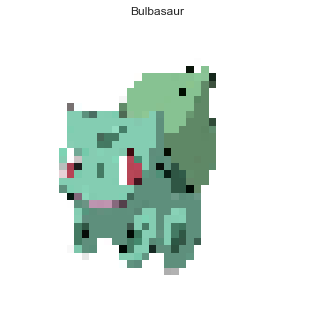

Prediction 270 Bulbasaur


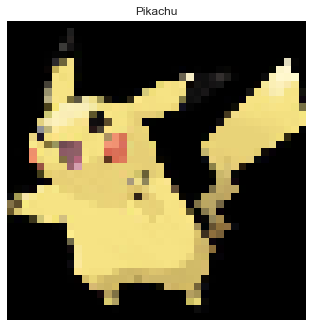

Prediction 271 Pikachu


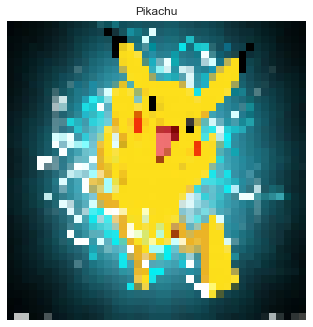

Prediction 273 Pikachu


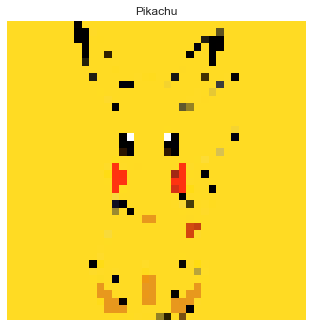

Prediction 274 Pikachu


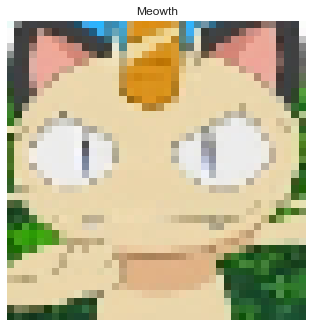

Prediction 275 Meowth


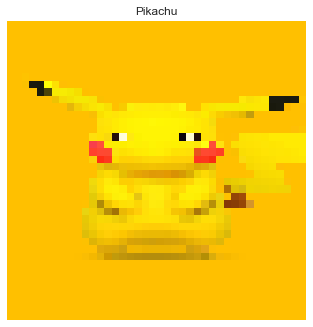

Prediction 277 Pikachu


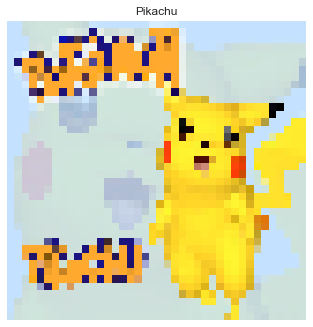

Prediction 278 Pikachu


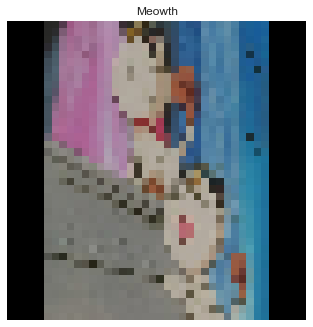

Prediction 279 Meowth


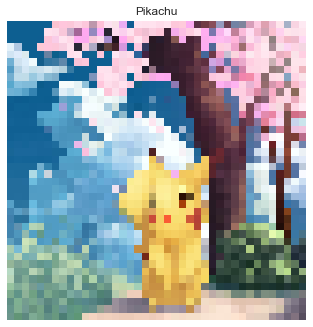

Prediction 280 Pikachu


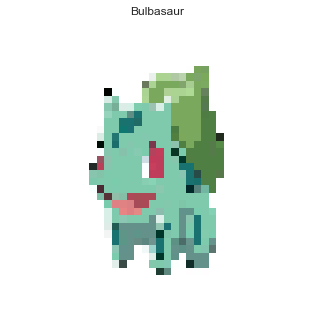

Prediction 281 Bulbasaur


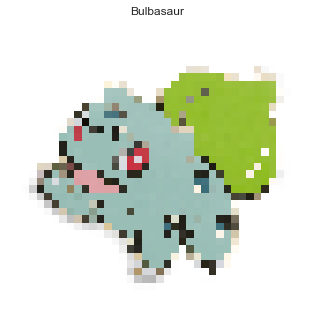

Prediction 282 Bulbasaur


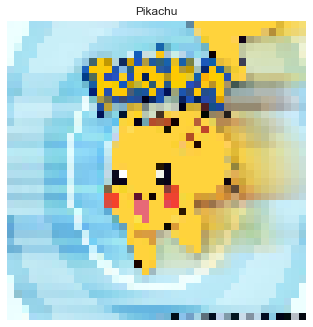

Prediction 283 Pikachu


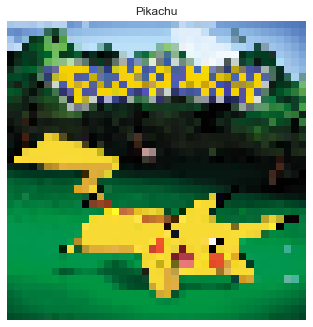

Prediction 284 Pikachu


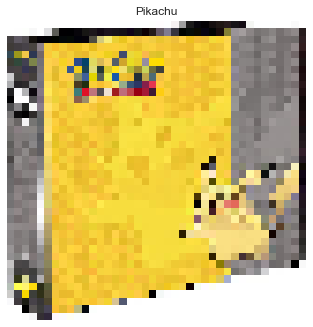

Prediction 285 Pikachu


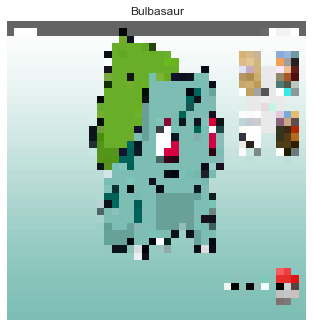

Prediction 286 Bulbasaur


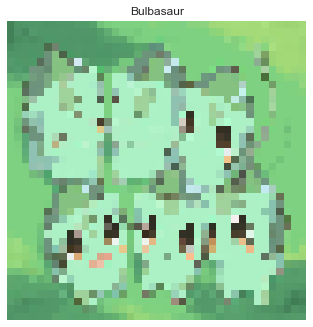

Prediction 287 Bulbasaur


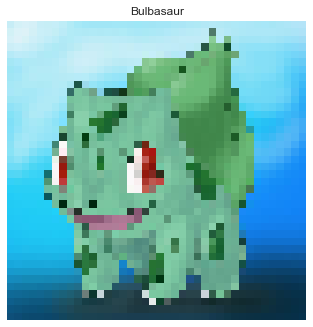

Prediction 288 Bulbasaur


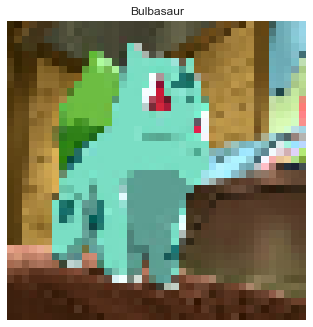

Prediction 289 Bulbasaur


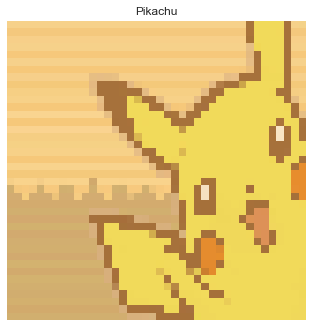

Prediction 291 Pikachu


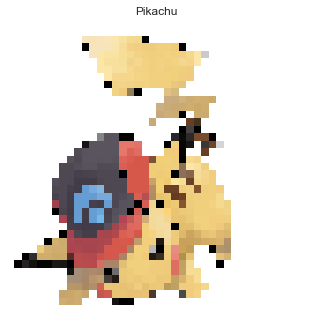

Prediction 292 Pikachu


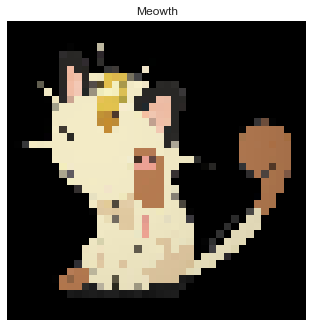

Prediction 293 Meowth


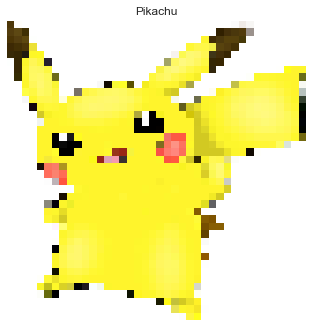

Prediction 294 Pikachu


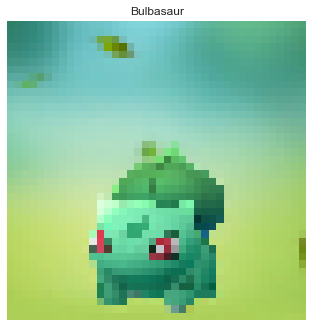

Prediction 295 Bulbasaur


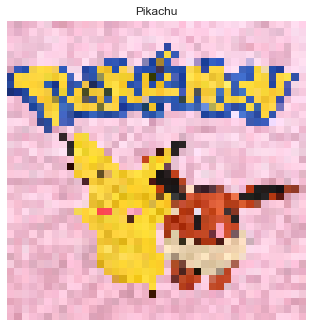

Prediction 296 Pikachu


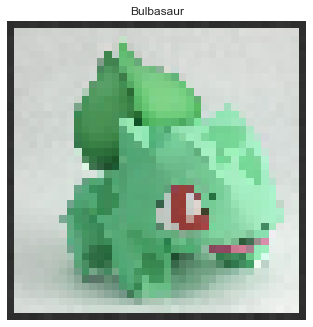

Prediction 298 Bulbasaur


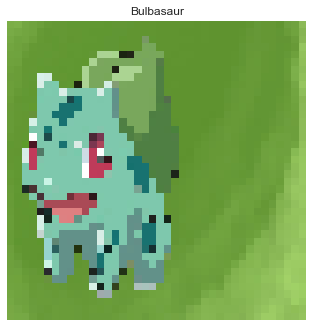

Prediction 299 Bulbasaur


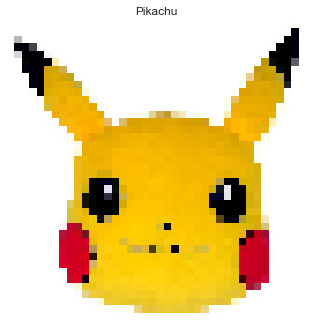

Prediction 300 Pikachu


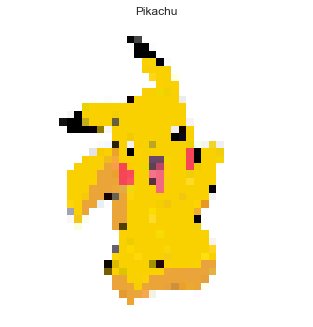

Prediction 301 Pikachu


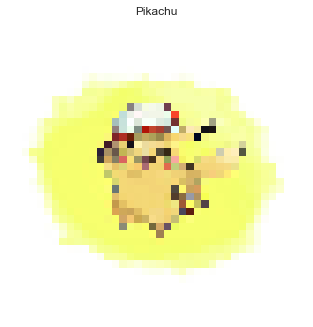

Prediction 302 Pikachu


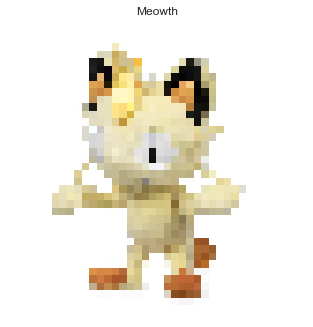

Prediction 303 Meowth


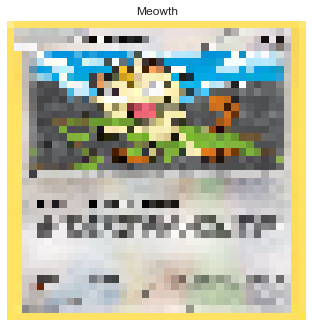

Prediction 304 Meowth


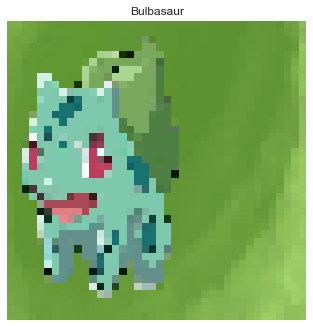

Prediction 305 Bulbasaur


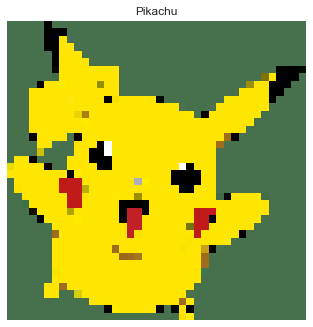

Prediction 306 Pikachu


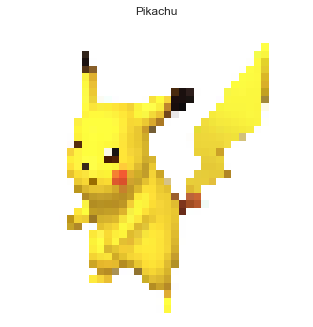

Prediction 307 Pikachu


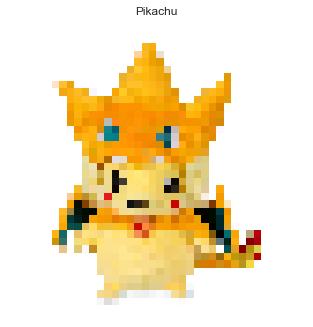

Prediction 308 Pikachu


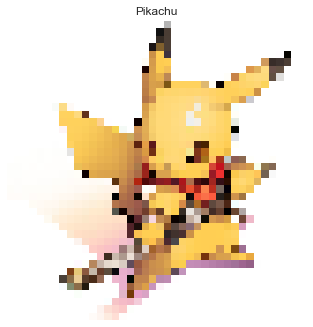

Prediction 309 Pikachu


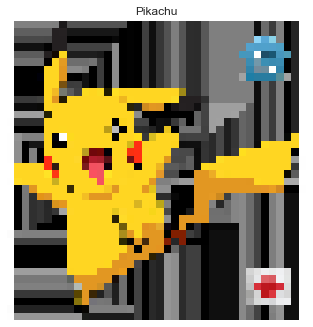

Prediction 310 Pikachu


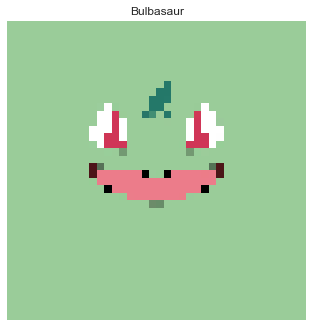

Prediction 311 Bulbasaur


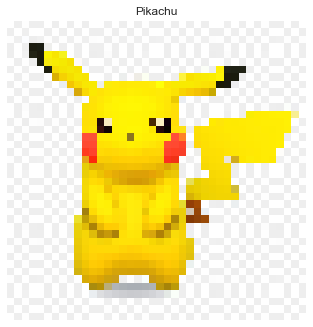

Prediction 313 Pikachu


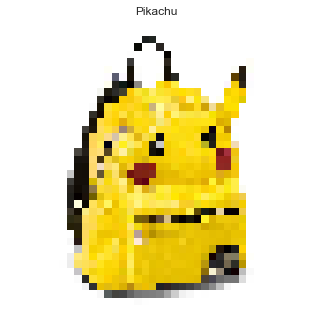

Prediction 314 Pikachu


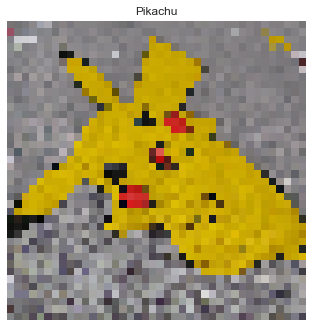

Prediction 316 Pikachu


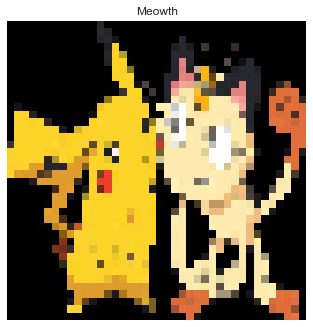

Prediction 317 Meowth


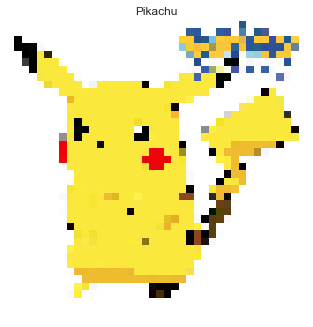

Prediction 318 Pikachu


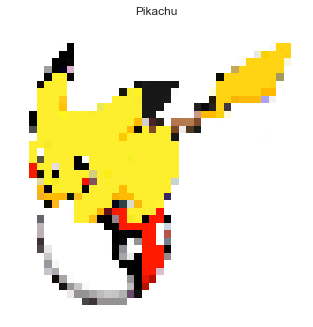

Prediction 319 Pikachu


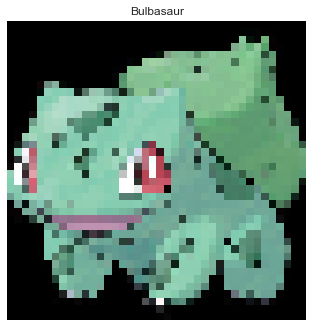

Prediction 320 Bulbasaur


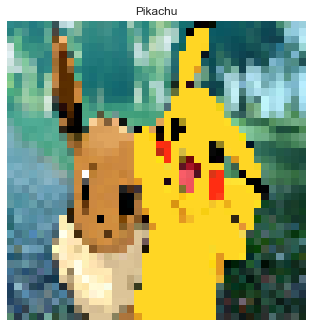

Prediction 322 Pikachu


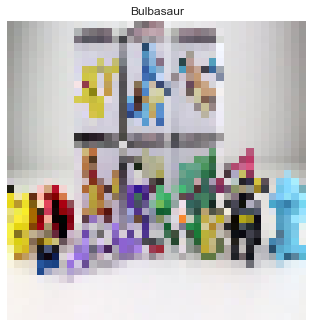

Prediction 323 Bulbasaur


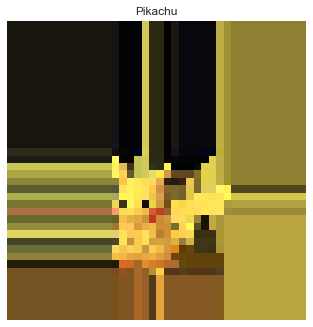

Prediction 324 Pikachu


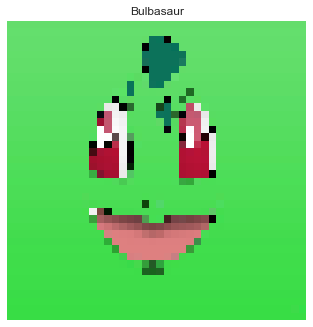

Prediction 325 Bulbasaur


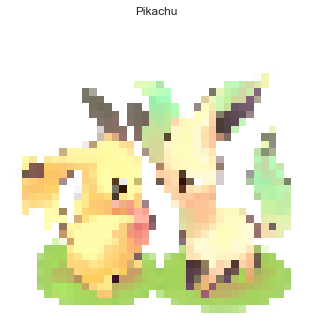

Prediction 326 Pikachu


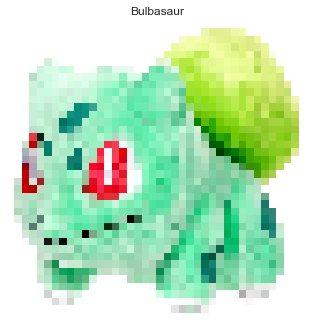

Prediction 327 Bulbasaur


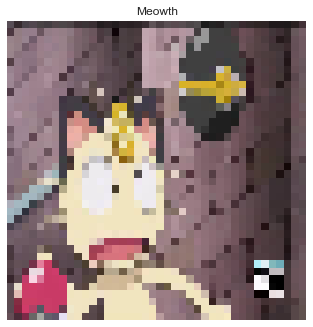

Prediction 328 Meowth


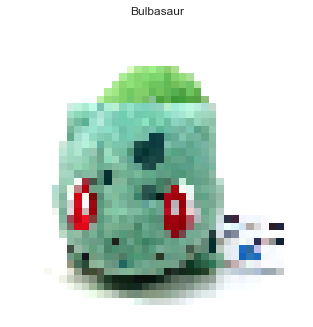

Prediction 329 Bulbasaur


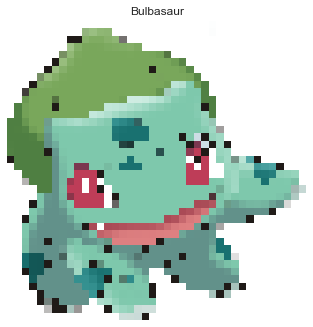

Prediction 330 Bulbasaur


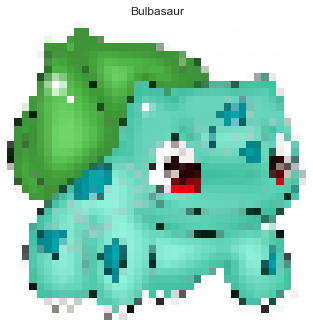

Prediction 331 Bulbasaur


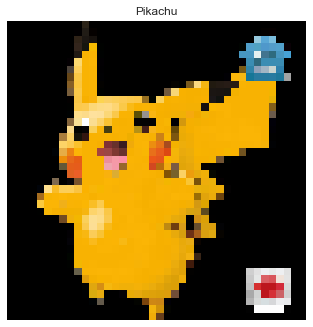

Prediction 332 Pikachu


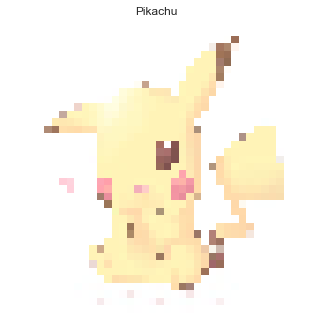

Prediction 333 Pikachu


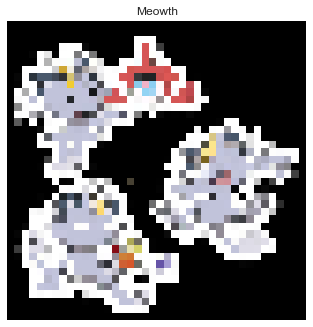

Prediction 334 Meowth


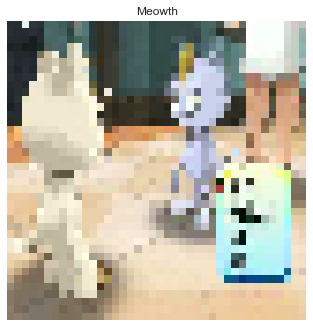

Prediction 335 Meowth


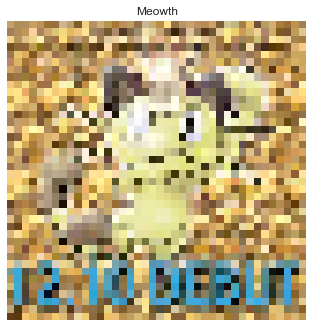

Prediction 337 Meowth


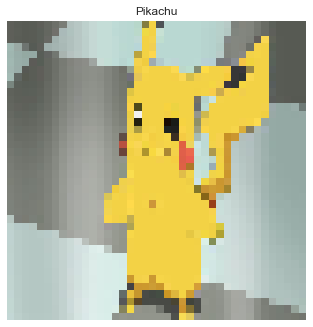

Prediction 338 Pikachu


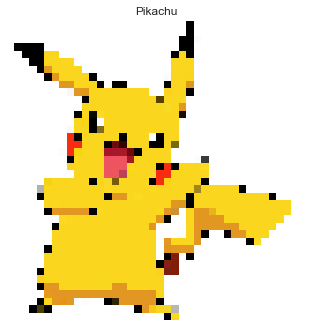

Prediction 339 Pikachu


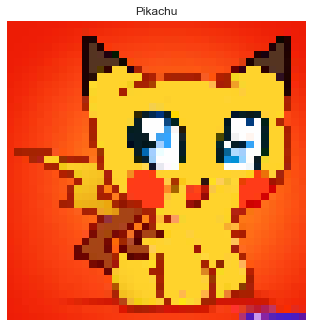

Prediction 340 Pikachu


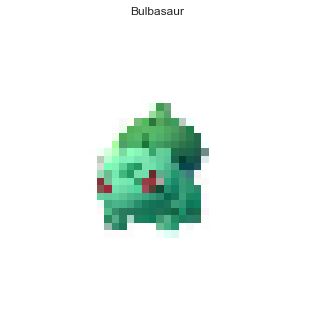

Prediction 341 Bulbasaur


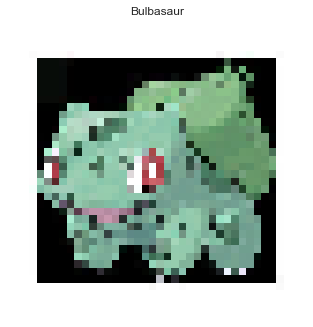

Prediction 342 Bulbasaur


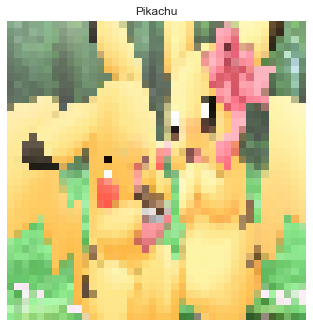

Prediction 343 Pikachu


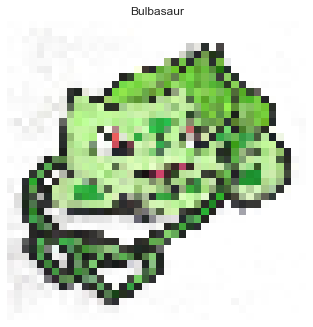

Prediction 344 Bulbasaur


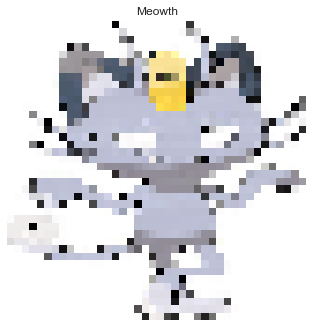

Prediction 345 Meowth


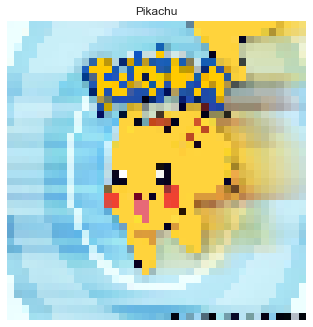

Prediction 346 Pikachu


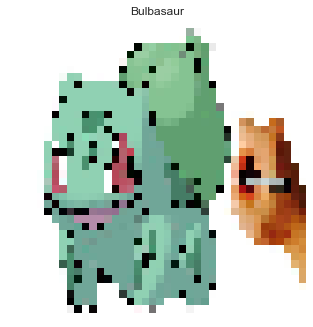

Prediction 349 Bulbasaur


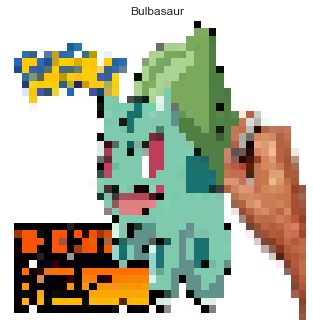

Prediction 350 Bulbasaur


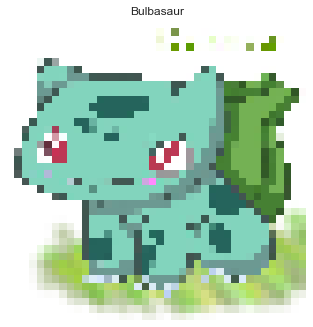

Prediction 352 Bulbasaur


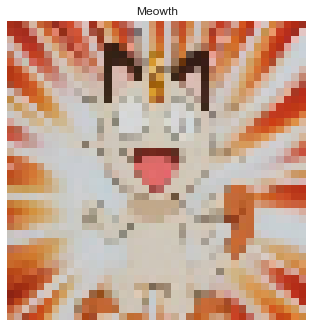

Prediction 353 Meowth


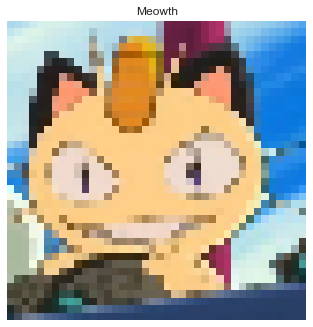

Prediction 355 Meowth


In [127]:
for i in range(Y.shape[0]):
    if Y[i] == outputs[i]:
        drawImg(X[i].reshape(40,40,3),Y[i])
        print("Prediction %d %s"%(i,label2pokemon[outputs[i]]))